# Problem Statement-  Predicting the status of the wining team of IPL Cricket League on current score, balls left, current run rate, wickets left etc.

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [2]:
data=pd.read_csv(r"C:\Users\khush\Downloads\archive (4)\IPL_B2B_Dataset.csv")
data.head(10) #Loading Dataset

,Index,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate,result
0,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.000000,10.43697479,0
1,1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.000000,10.52542373,0
2,2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.000000,10.61538462,0
3,3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.500000,10.60344828,0
4,4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.400000,10.48695652,0
5,5,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,197,114,10,208,11.000000,10.36842105,0
6,6,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,197,113,10,208,9.428571,10.46017699,0
7,7,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,197,112,10,208,8.250000,10.55357143,0
8,8,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,196,111,10,208,8.000000,10.59459459,0
9,9,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,196,110,10,208,7.200000,10.69090909,0


In [3]:
data.shape #shape of data

(72413, 11)

In [4]:
data.columns #display the columns names of data

Index(['Index', 'batting_team', 'bowling_team', 'city', 'runs_left',
       'balls_left', 'wickets', 'target_runs', 'cur_run_rate', 'req_run_rate',
       'result'],
      dtype='object')

In [5]:
data.info() #information about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72413 entries, 0 to 72412
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Index         72413 non-null  int64  
 1   batting_team  72413 non-null  object 
 2   bowling_team  72413 non-null  object 
 3   city          71581 non-null  object 
 4   runs_left     72413 non-null  int64  
 5   balls_left    72413 non-null  int64  
 6   wickets       72413 non-null  int64  
 7   target_runs   72413 non-null  int64  
 8   cur_run_rate  72413 non-null  float64
 9   req_run_rate  72408 non-null  object 
 10  result        72413 non-null  int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 6.1+ MB


In [6]:
data=data.drop(['Index'],axis=1) #droping the unique(Index) column 
data

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate,result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,119,10,208,6.000000,10.43697479,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,118,10,208,3.000000,10.52542373,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207,117,10,208,2.000000,10.61538462,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205,116,10,208,4.500000,10.60344828,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201,115,10,208,8.400000,10.48695652,0
...,...,...,...,...,...,...,...,...,...,...
72408,Chennai Super Kings,Mumbai Indians,Hyderabad,1,4,5,153,7.862069,1.5,0
72409,Chennai Super Kings,Mumbai Indians,Hyderabad,-1,3,5,153,7.897436,-2,0
72410,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,2,4,153,7.881356,-6,0
72411,Chennai Super Kings,Mumbai Indians,Hyderabad,-4,1,4,153,7.915966,-24,0


# DATA CLEANING

In [7]:
data.isnull().sum() #Checking the null values

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
target_runs       0
cur_run_rate      0
req_run_rate      5
result            0
dtype: int64

In [8]:
data.city.value_counts() #value count of city column

Mumbai            9911
Kolkata           7805
Delhi             7280
Hyderabad         6523
Chennai           6317
Bangalore         5927
Jaipur            4835
Chandigarh        4572
Durban            1725
Bengaluru         1610
Ahmedabad         1398
Pune              1321
Centurion         1269
Mohali            1202
Dharamsala        1044
Visakhapatnam     1036
Johannesburg       945
Port Elizabeth     807
Abu Dhabi          776
Cuttack            714
Ranchi             711
Sharjah            695
Cape Town          683
Indore             595
Raipur             566
Nagpur             372
Kimberley          358
East London        335
Bloemfontein       249
Name: city, dtype: int64

In [9]:
data.req_run_rate.value_counts()   #value count of req_run_rate

6               692
12              624
9               558
10              327
8               315
               ... 
11.67123288       1
18.24             1
68.4              1
264               1
-3.666666667      1
Name: req_run_rate, Length: 8997, dtype: int64

In [10]:
n_samples = data.shape[0]  # store the number of samples and null features.
number_of_null_features = (data.isnull().sum()>0).sum()

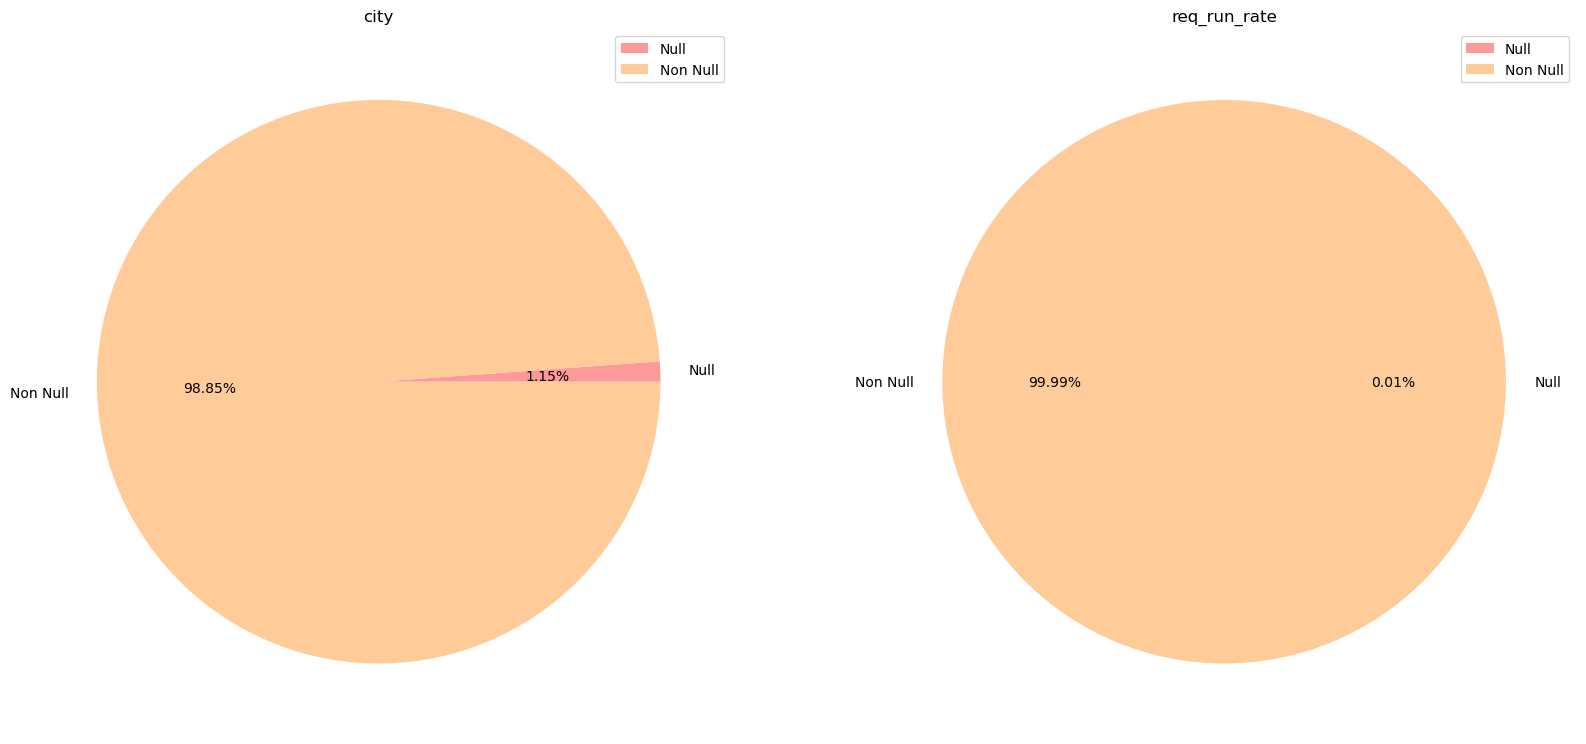

In [11]:
#We use pie charts to visualize the features containing null values.

figure, ax = plt.subplots(1,number_of_null_features, figsize=(20, 25))
colors = ['#ff9999', '#ffcc99']
i = 0
j = 0
for col in data.columns:
    n_null = data[col].isnull().sum()
    if(n_null>0):
        ax[i].title.set_text(col)
        ax[i].pie([n_null,n_samples-n_null], labels=['Null','Non Null'], autopct = '%1.2f%%', colors = colors)
        ax[i].legend()
        i+=1

In [12]:
data=data.dropna() #droping the null values

In [13]:
data.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
target_runs     0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [14]:
data.dtypes #Data type of each column

batting_team     object
bowling_team     object
city             object
runs_left         int64
balls_left        int64
wickets           int64
target_runs       int64
cur_run_rate    float64
req_run_rate     object
result            int64
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder #data type conversion
le=LabelEncoder()

In [16]:
data.batting_team =le.fit_transform(data.batting_team )
data.bowling_team =le.fit_transform(data.bowling_team)
data.city =le.fit_transform(data.city)
data.req_run_rate =le.fit_transform(data.req_run_rate  )



In [17]:
data.dtypes

batting_team      int32
bowling_team      int32
city              int32
runs_left         int64
balls_left        int64
wickets           int64
target_runs       int64
cur_run_rate    float64
req_run_rate      int32
result            int64
dtype: object

# Data Splitting

In [18]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [19]:
x.head(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate
0,8,9,14,207,119,10,208,6.0,714
1,8,9,14,207,118,10,208,3.0,775
2,8,9,14,207,117,10,208,2.0,842
3,8,9,14,205,116,10,208,4.5,834
4,8,9,14,201,115,10,208,8.4,757


In [20]:
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [23]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((57260, 9), (14316, 9), (57260,), (14316,))

In [24]:
x_train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate
67993,4,9,20,94,63,9,159,6.842105,8212
59536,3,6,21,184,110,10,205,12.600000,422
70122,2,7,16,117,61,8,197,8.135593,1451
67917,5,7,16,31,55,8,151,11.076923,4371
58540,5,9,10,67,39,6,163,7.111111,619


In [25]:
x_test.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate
25541,5,4,19,48,58,8,120,6.967742,5227
68976,9,2,14,65,33,8,165,6.896552,1651
58457,8,3,25,1,12,6,139,7.666667,183
49862,5,0,19,131,91,9,166,7.241379,7978
52938,9,5,19,52,14,3,168,6.566038,3976


In [26]:
y_train.head()

67993    1
59536    1
70122    1
67917    1
58540    0
Name: result, dtype: int64

In [27]:
y_test.head()

25541    1
68976    0
58457    1
49862    1
52938    0
Name: result, dtype: int64

# Model-1

# Logistic regression

In [28]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [29]:
lg.fit(x_train,y_train)

LogisticRegression()

In [30]:
lg_p1=lg.predict(x_test)
lg_p1

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix
lg_cf1=confusion_matrix(y_test,lg_p1)
lg_cf1 

array([[4936, 1830],
       [1599, 5951]], dtype=int64)

In [32]:
lg_ac1=lg_cf1.diagonal().sum()/lg_cf1.sum()*100
lg_ac1

76.04777870913662

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,lg_p1))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74      6766
           1       0.76      0.79      0.78      7550

    accuracy                           0.76     14316
   macro avg       0.76      0.76      0.76     14316
weighted avg       0.76      0.76      0.76     14316



In [35]:
lg_f1=f1_score(y_test,lg_p1)
lg_pr1=precision_score(y_test,lg_p1)
lg_r1=recall_score(y_test,lg_p1)
print(lg_f1,lg_pr1,lg_r1)

0.7763355293196791 0.7648117208585015 0.7882119205298014


# Decision Tree

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [37]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
dt_p1=dt.predict(x_test)
dt_p1

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [39]:
dt_c1=confusion_matrix(y_test,dt_p1)
dt_c1

array([[6675,   91],
       [ 105, 7445]], dtype=int64)

In [40]:
dt_ac1=dt_c1.diagonal().sum()/dt_c1.sum()*100
dt_ac1

98.63090248672813

In [41]:
print(classification_report(y_test,dt_p1))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6766
           1       0.99      0.99      0.99      7550

    accuracy                           0.99     14316
   macro avg       0.99      0.99      0.99     14316
weighted avg       0.99      0.99      0.99     14316



In [42]:
dt_f1=f1_score(y_test,dt_p1)
dt_pr1=precision_score(y_test,dt_p1)
dt_r1=recall_score(y_test,dt_p1)
print(dt_f1,dt_pr1,dt_r1)

0.9870078218215563 0.9879246284501062 0.9860927152317881


# Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
rf_p1=rf.predict(x_test)

In [46]:
rf_c1=confusion_matrix(y_test,rf_p1)
rf_c1

array([[6753,   13],
       [  28, 7522]], dtype=int64)

In [47]:
rf_ac1=rf_c1.diagonal().sum()/rf_c1.sum()*100
rf_ac1

99.71360715283599

In [48]:
print(classification_report(y_test,rf_p1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6766
           1       1.00      1.00      1.00      7550

    accuracy                           1.00     14316
   macro avg       1.00      1.00      1.00     14316
weighted avg       1.00      1.00      1.00     14316



In [49]:
rf_f1=f1_score(y_test,rf_p1)
rf_pr1=precision_score(y_test,rf_p1)
rf_r1=recall_score(y_test,rf_p1)
print(rf_f1,rf_pr1,rf_r1)

0.9972820682797482 0.9982747179827471 0.9962913907284768


In [50]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import cross_val_score

In [51]:
#rf3 = RandomForestClassifier(n_estimators=100, random_state=42) 

In [52]:
#k = 8  # Number of folds
#rf_scores = cross_val_score(rf3, x_train, y_train, cv=k, scoring='accuracy')

In [53]:
#print("Accuracy Scores for Each Fold:")
#print(rf_scores)

In [54]:
#rf_mean_accuracy = rf_scores.mean()
#print("Mean Accuracy:", rf_mean_accuracy)

# KNN

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [56]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
knn_p1=knn.predict(x_test)

In [58]:
knn_c1=confusion_matrix(y_test,knn_p1)
knn_c1

array([[5001, 1765],
       [1828, 5722]], dtype=int64)

In [59]:
knn_ac1=knn_c1.diagonal().sum()/knn_c1.sum()*100
knn_ac1

74.90220732048058

In [60]:
print(classification_report(y_test,knn_p1))

              precision    recall  f1-score   support

           0       0.73      0.74      0.74      6766
           1       0.76      0.76      0.76      7550

    accuracy                           0.75     14316
   macro avg       0.75      0.75      0.75     14316
weighted avg       0.75      0.75      0.75     14316



In [61]:
knn_f1=f1_score(y_test,knn_p1)
knn_pr1=precision_score(y_test,knn_p1)
knn_r1=recall_score(y_test,knn_p1)
print(knn_f1,knn_pr1,knn_r1)

0.7610560617144377 0.7642580472819553 0.7578807947019868


# XGBOOST

In [62]:
import xgboost
from xgboost import XGBClassifier

In [63]:
xgb=XGBClassifier()

In [64]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [65]:
xgb_p1=xgb.predict(x_test)

In [66]:
xgb_c1=confusion_matrix(y_test,xgb_p1)
xgb_c1

array([[6761,    5],
       [   5, 7545]], dtype=int64)

In [67]:
xgb_ac1=xgb_c1.diagonal().sum()/xgb_c1.sum()*100
xgb_ac1

99.93014808605756

In [68]:
print(classification_report(y_test,xgb_p1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6766
           1       1.00      1.00      1.00      7550

    accuracy                           1.00     14316
   macro avg       1.00      1.00      1.00     14316
weighted avg       1.00      1.00      1.00     14316



In [69]:
xgb_f1=f1_score(y_test,xgb_p1)
xgb_pr1=precision_score(y_test,xgb_p1)
xgb_r1=recall_score(y_test,xgb_p1)
print(xgb_f1,xgb_pr1,xgb_r1)

0.9993377483443708 0.9993377483443708 0.9993377483443708


# SVM

In [70]:
from sklearn.svm import SVC
svm=SVC()

In [71]:
svm.fit(x_train,y_train)

SVC()

In [72]:
svm_p1=svm.predict(x_test)

In [73]:
svm_cf1=confusion_matrix(y_test,svm_p1)
svm_cf1

array([[4772, 1994],
       [2015, 5535]], dtype=int64)

In [74]:
svm_ac1=svm_cf1.diagonal().sum()/svm_cf1.sum()*100
svm_ac1

71.99636770047499

In [75]:
print(classification_report(y_test,svm_p1))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      6766
           1       0.74      0.73      0.73      7550

    accuracy                           0.72     14316
   macro avg       0.72      0.72      0.72     14316
weighted avg       0.72      0.72      0.72     14316



In [76]:
svm_f1=f1_score(y_test,svm_p1)
svm_pr1=precision_score(y_test,svm_p1)
svm_r1=recall_score(y_test,svm_p1)
print(svm_f1,svm_pr1,svm_r1)

0.7341335632336361 0.7351573914198433 0.733112582781457


In [77]:
L1=["Logistic","DT","Rf","XGB","SVM","KNN"]
L2=[lg_ac1,dt_ac1,rf_ac1,xgb_ac1,svm_ac1,knn_ac1]
L3=[lg_pr1,dt_pr1,rf_pr1,xgb_pr1,svm_pr1,knn_pr1]
L4=[lg_r1,dt_r1,rf_r1,xgb_r1,svm_r1,knn_r1]
L5=[lg_f1,dt_f1,rf_f1,xgb_f1,svm_f1,knn_f1]

In [78]:
df1=pd.DataFrame({"Model":L1,"Accuracy":L2,"Precision":L3,"Recall":L4,"f1_score":L5})
df1

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,76.047779,0.764812,0.788212,0.776336
1,DT,98.630902,0.987925,0.986093,0.987008
2,Rf,99.713607,0.998275,0.996291,0.997282
3,XGB,99.930148,0.999338,0.999338,0.999338
4,SVM,71.996368,0.735157,0.733113,0.734134
5,KNN,74.902207,0.764258,0.757881,0.761056


<AxesSubplot:>

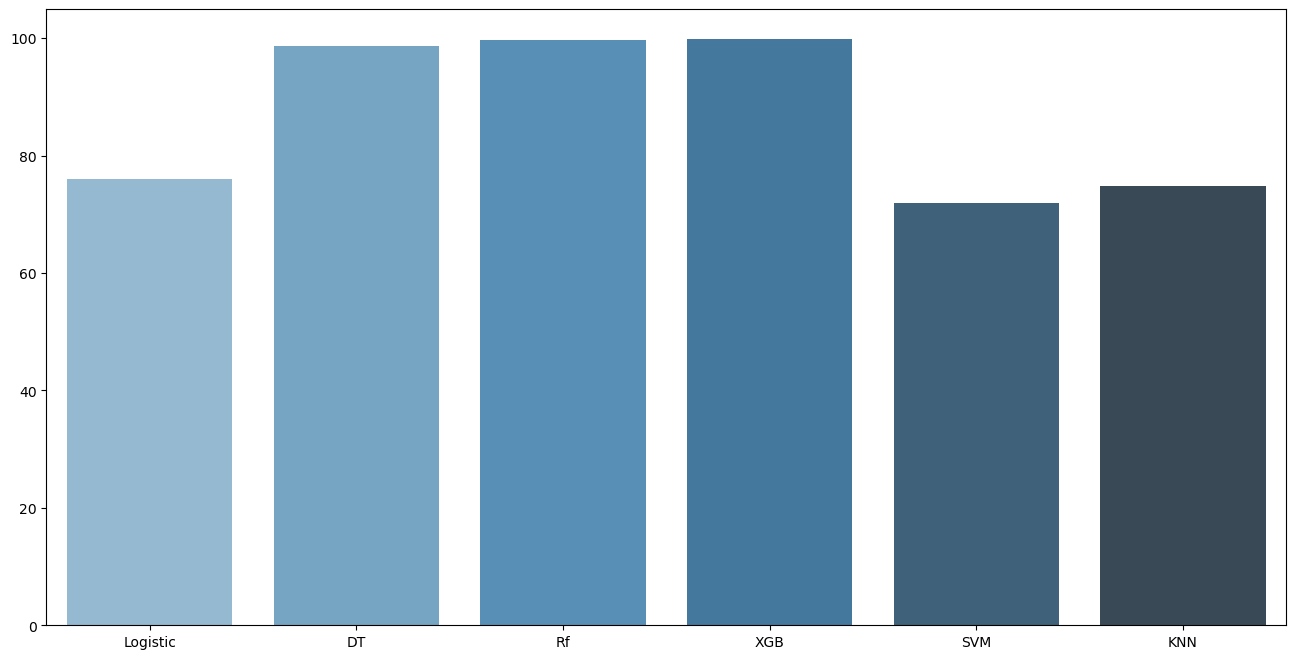

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,8))
sns.barplot(x = L1, y = L2, palette="Blues_d")

In [81]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'PRC-CURVE')

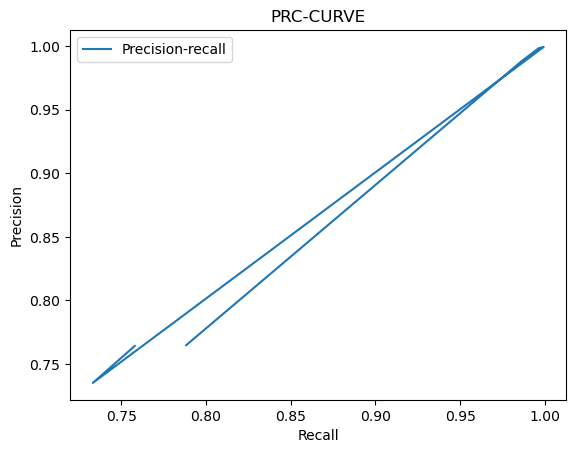

In [82]:
plt.plot(L4,L3,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# CI

In [83]:
data.result.value_counts()

1    37595
0    33981
Name: result, dtype: int64

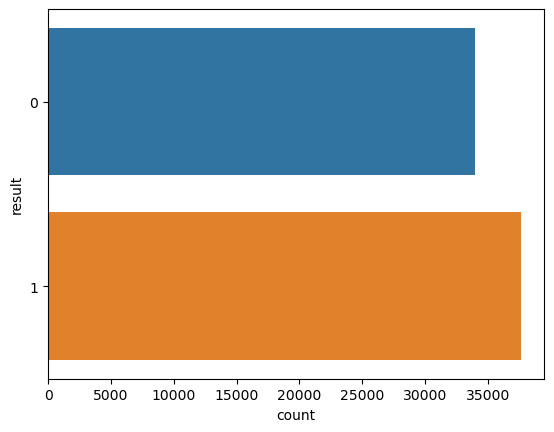

In [84]:
sns.countplot(data=data,y="result")
plt.show()

# EDA Process

# Outlier

<AxesSubplot:>

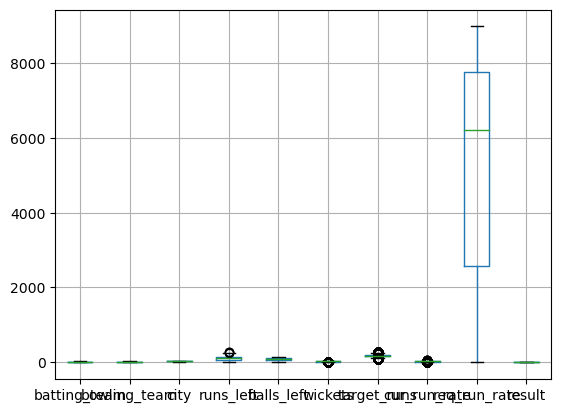

In [85]:
data.boxplot() #outlier detection

<AxesSubplot:ylabel='runs_left'>

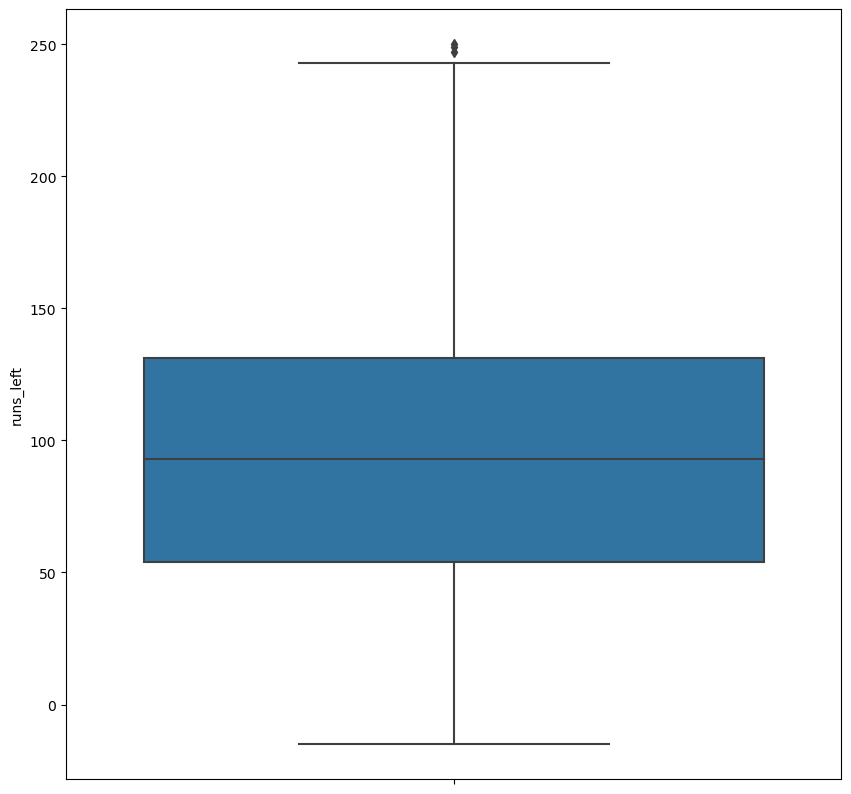

In [86]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data,y="runs_left")

<AxesSubplot:>

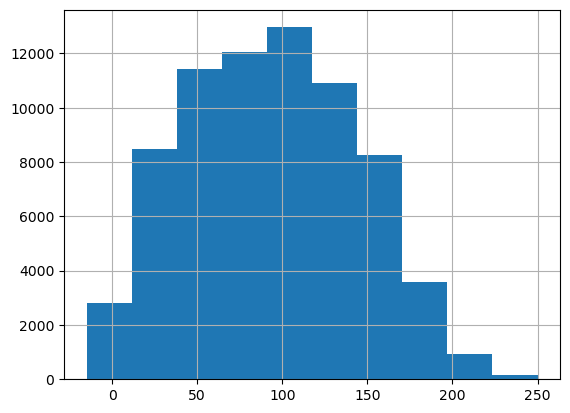

In [87]:
data.runs_left.hist()

<AxesSubplot:xlabel='runs_left', ylabel='Density'>

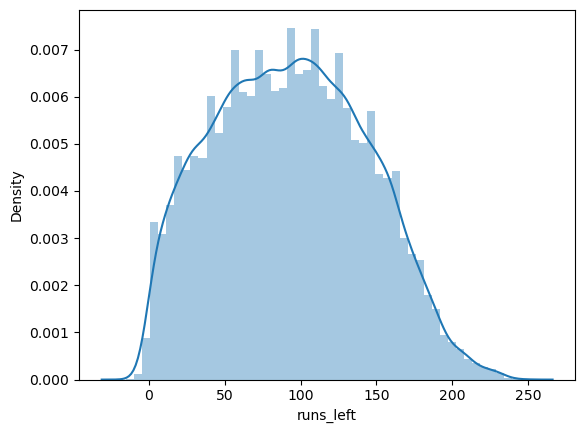

In [88]:
sns.distplot(data.runs_left)

In [89]:
ub=data["runs_left"].mean()+3*data["runs_left"].std()
lb=data["runs_left"].mean()-3*data["runs_left"].std()
print(ub,lb)

243.55995522387724 -56.79332953929024


In [90]:
data.loc[data["runs_left"]>243,"runs_left"]=243

<AxesSubplot:>

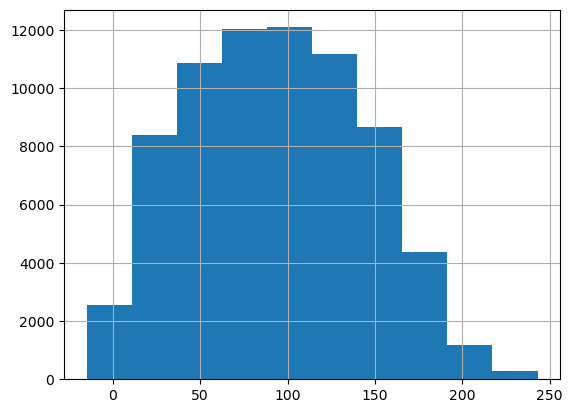

In [91]:
data.runs_left.hist()

<AxesSubplot:xlabel='runs_left', ylabel='Density'>

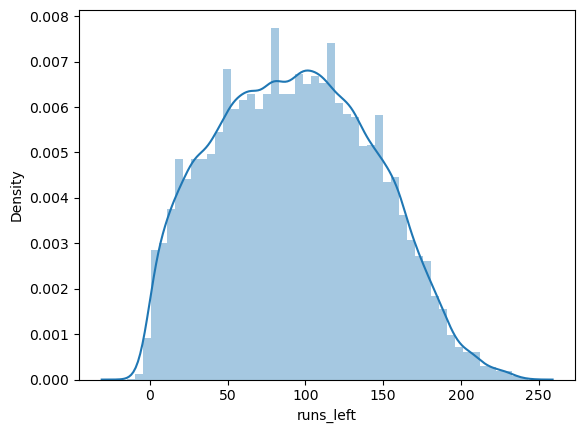

In [92]:
sns.distplot(data.runs_left)

<AxesSubplot:ylabel='wickets'>

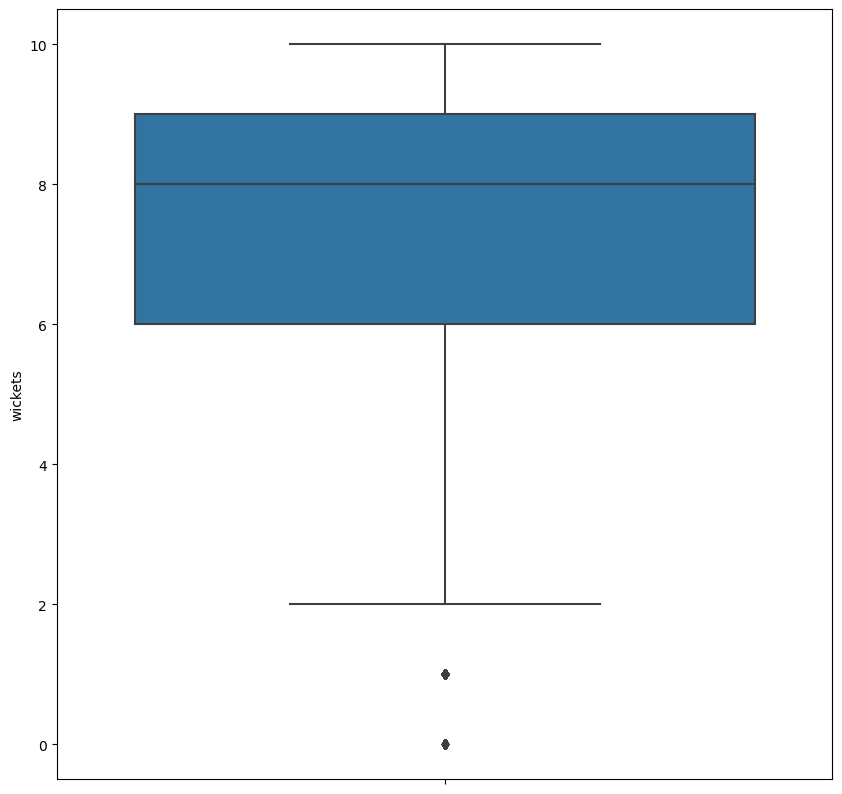

In [93]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data,y="wickets")

<AxesSubplot:>

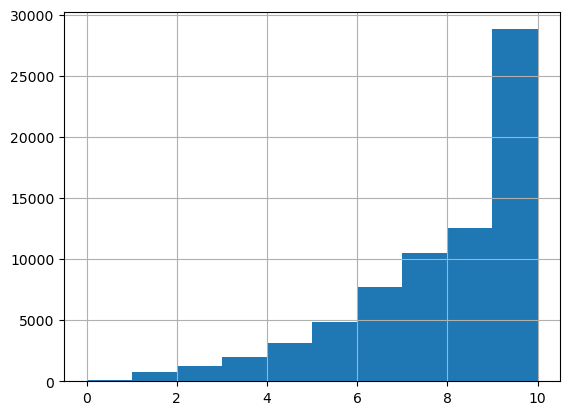

In [94]:
data.wickets.hist()

<AxesSubplot:xlabel='wickets', ylabel='Density'>

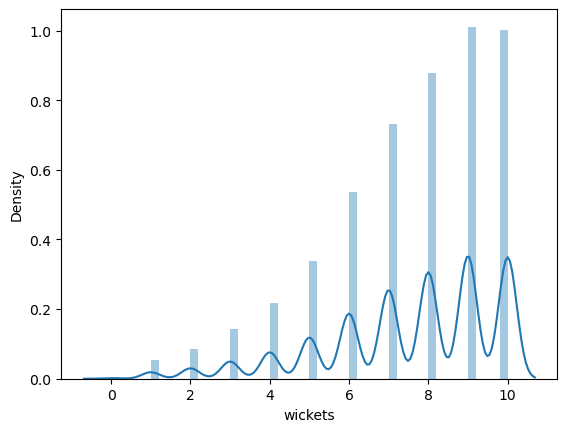

In [95]:
sns.distplot(data.wickets)

In [96]:
ub1=data["wickets"].mean()+3*data["wickets"].std()
lb1=data["wickets"].mean()-3*data["wickets"].std()
print(ub1,lb1)

13.95661386924717 1.1191936640042002


In [97]:
data.loc[data["wickets"]<1,"wickets"]=1

<AxesSubplot:>

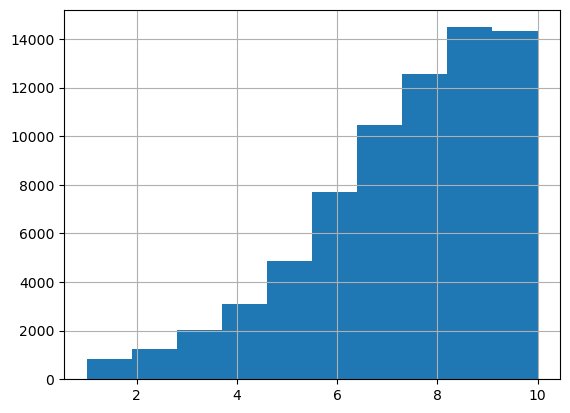

In [98]:
data.wickets.hist()

<AxesSubplot:xlabel='wickets', ylabel='Density'>

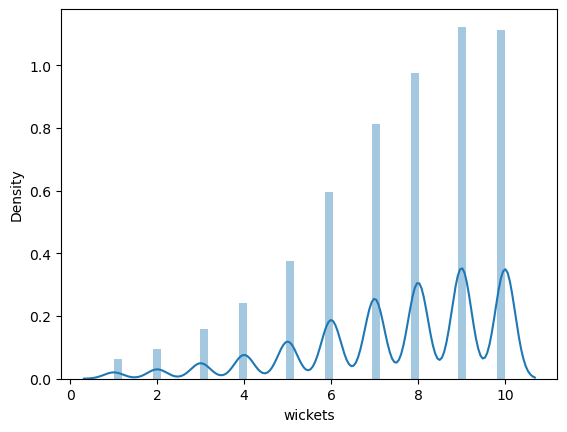

In [99]:
sns.distplot(data.wickets)

<AxesSubplot:ylabel='target_runs'>

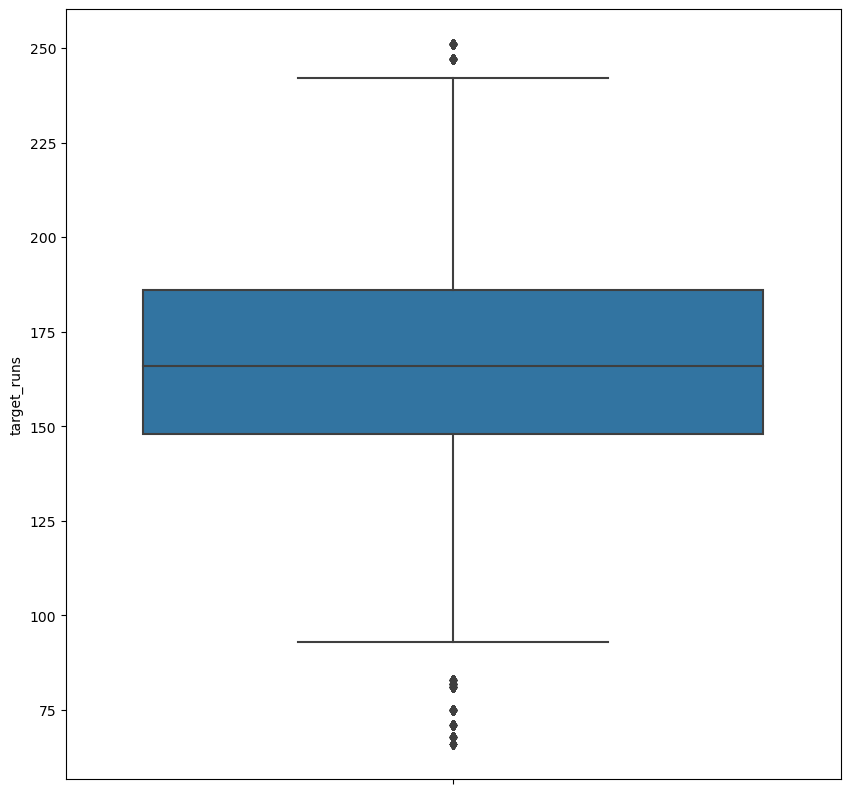

In [100]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data,y="target_runs")

<AxesSubplot:>

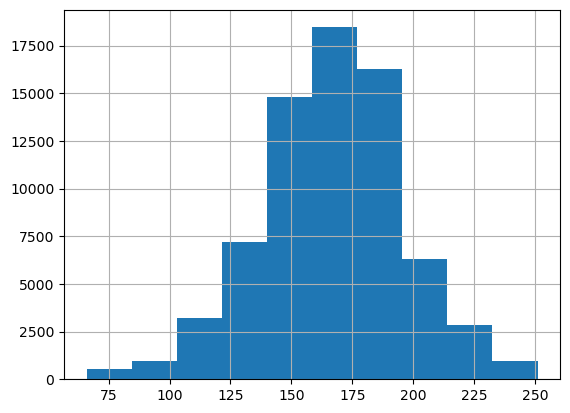

In [101]:
data.target_runs.hist()

<AxesSubplot:xlabel='target_runs', ylabel='Density'>

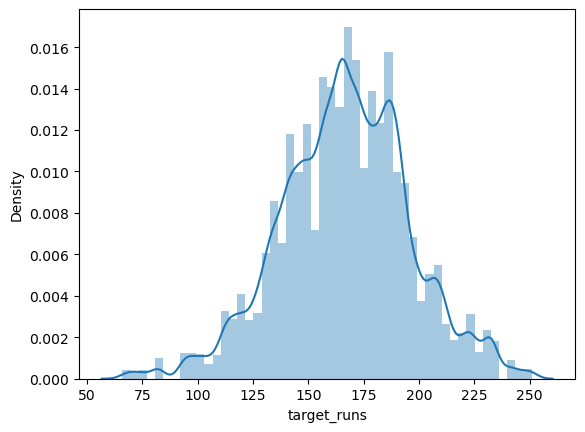

In [102]:
sns.distplot(data.target_runs)

In [103]:
ub2=data["target_runs"].mean()+3*data["target_runs"].std()
lb2=data["target_runs"].mean()-3*data["target_runs"].std()
print(ub2,lb2)

254.64329832160877 78.89238403001747


In [104]:
data.loc[data["target_runs"]<78,"target_runs"]=78
data.loc[data["target_runs"]>254,"target_runs"]=254

<AxesSubplot:>

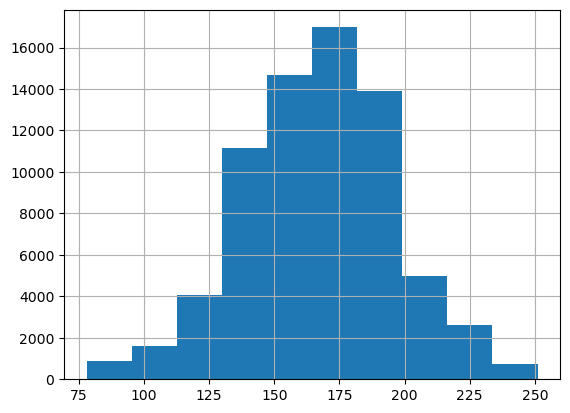

In [105]:
data.target_runs.hist()

<AxesSubplot:xlabel='target_runs', ylabel='Density'>

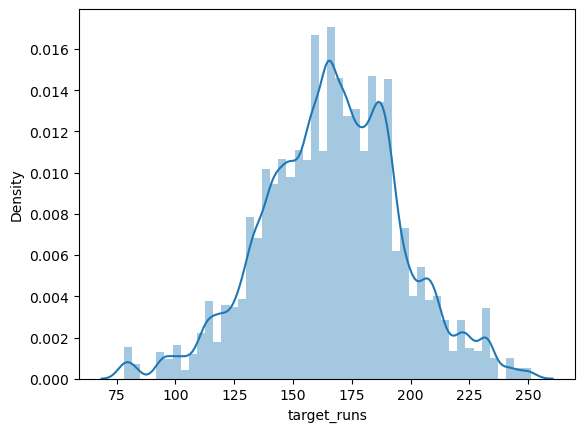

In [106]:
sns.distplot(data.target_runs)

<AxesSubplot:ylabel='cur_run_rate'>

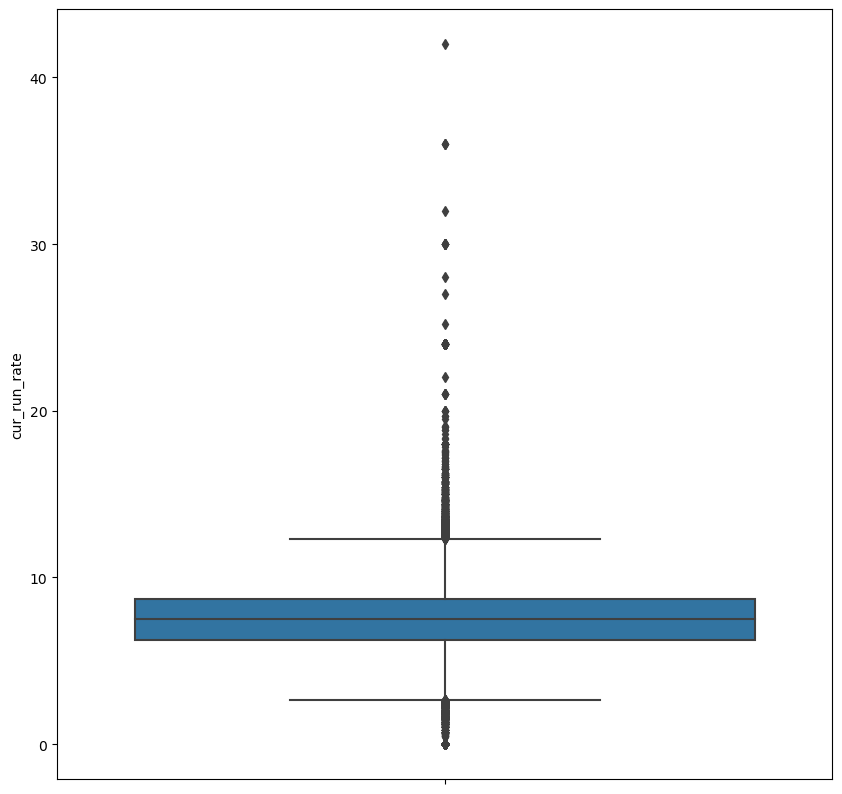

In [107]:
fig=plt.figure(figsize=(10,10))
sns.boxplot(data=data,y="cur_run_rate")

<AxesSubplot:>

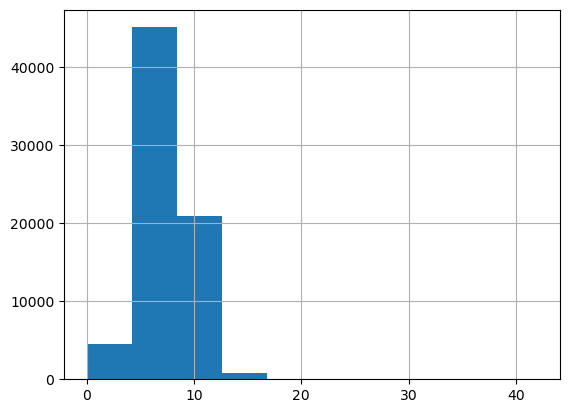

In [108]:
data.cur_run_rate.hist()

<AxesSubplot:xlabel='cur_run_rate', ylabel='Density'>

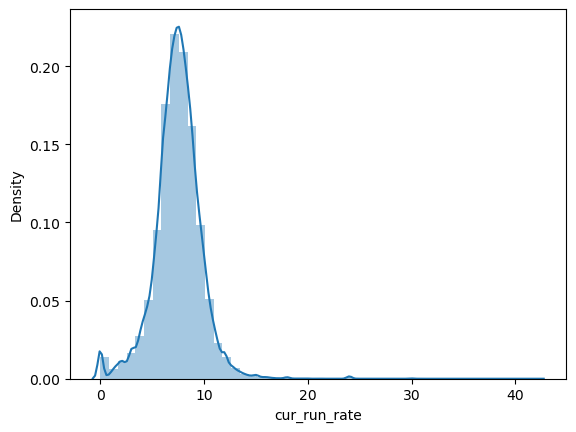

In [109]:
sns.distplot(data.cur_run_rate)

In [110]:
ub3=data["cur_run_rate"].mean()+3*data["cur_run_rate"].std()
lb3=data["cur_run_rate"].mean()-3*data["cur_run_rate"].std()
print(ub3,lb3)

14.283262636595847 0.6153859786166223


In [111]:
data.loc[data["cur_run_rate"]>14,"cur_run_rate"]=14
data.loc[data["cur_run_rate"]<0,"cur_run_rate"]=0

<AxesSubplot:>

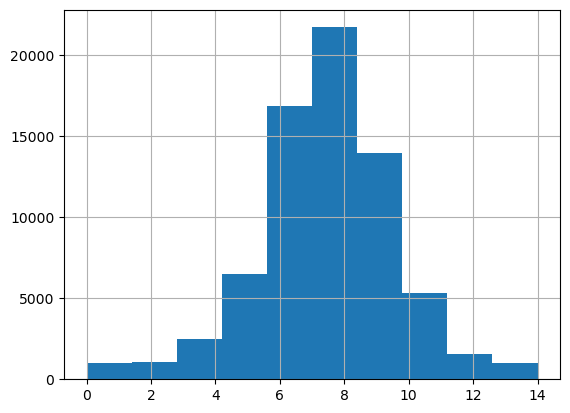

In [112]:
data.cur_run_rate.hist()

<AxesSubplot:xlabel='cur_run_rate', ylabel='Density'>

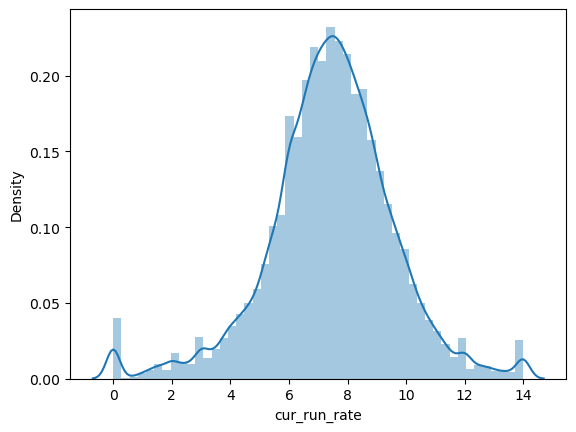

In [113]:
sns.distplot(data.cur_run_rate)

# Skewness

In [114]:
data.skew()

batting_team   -0.336615
bowling_team   -0.313815
city           -0.040595
runs_left       0.143733
balls_left     -0.065224
wickets        -0.883165
target_runs    -0.090696
cur_run_rate   -0.333002
req_run_rate   -0.421292
result         -0.101115
dtype: float64

# Correlation

In [115]:
corr1=data.corr()
corr1

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate,result
batting_team,1.000000,-0.119576,-0.027207,0.021271,0.005819,0.003238,0.015711,-0.019437,-0.019299,0.000382
bowling_team,-0.119576,1.000000,0.017518,0.003019,-0.003454,0.014072,0.013478,0.001700,-0.005074,0.029066
city,-0.027207,0.017518,1.000000,-0.009336,-0.001570,0.009511,-0.020171,-0.009081,0.064399,0.054944
runs_left,0.021271,0.003019,-0.009336,1.000000,0.839192,0.494643,0.396127,-0.232945,0.098824,-0.249700
balls_left,0.005819,-0.003454,-0.001570,0.839192,1.000000,0.754946,-0.069946,-0.199036,0.303422,0.052392
wickets,0.003238,0.014072,0.009511,0.494643,0.754946,1.000000,-0.158465,0.031978,0.315566,0.326918
target_runs,0.015711,0.013478,-0.020171,0.396127,-0.069946,-0.158465,1.000000,0.287821,-0.265167,-0.403393
cur_run_rate,-0.019437,0.001700,-0.009081,-0.232945,-0.199036,0.031978,0.287821,1.000000,-0.028820,0.135857
req_run_rate,-0.019299,-0.005074,0.064399,0.098824,0.303422,0.315566,-0.265167,-0.028820,1.000000,0.208939
result,0.000382,0.029066,0.054944,-0.249700,0.052392,0.326918,-0.403393,0.135857,0.208939,1.000000


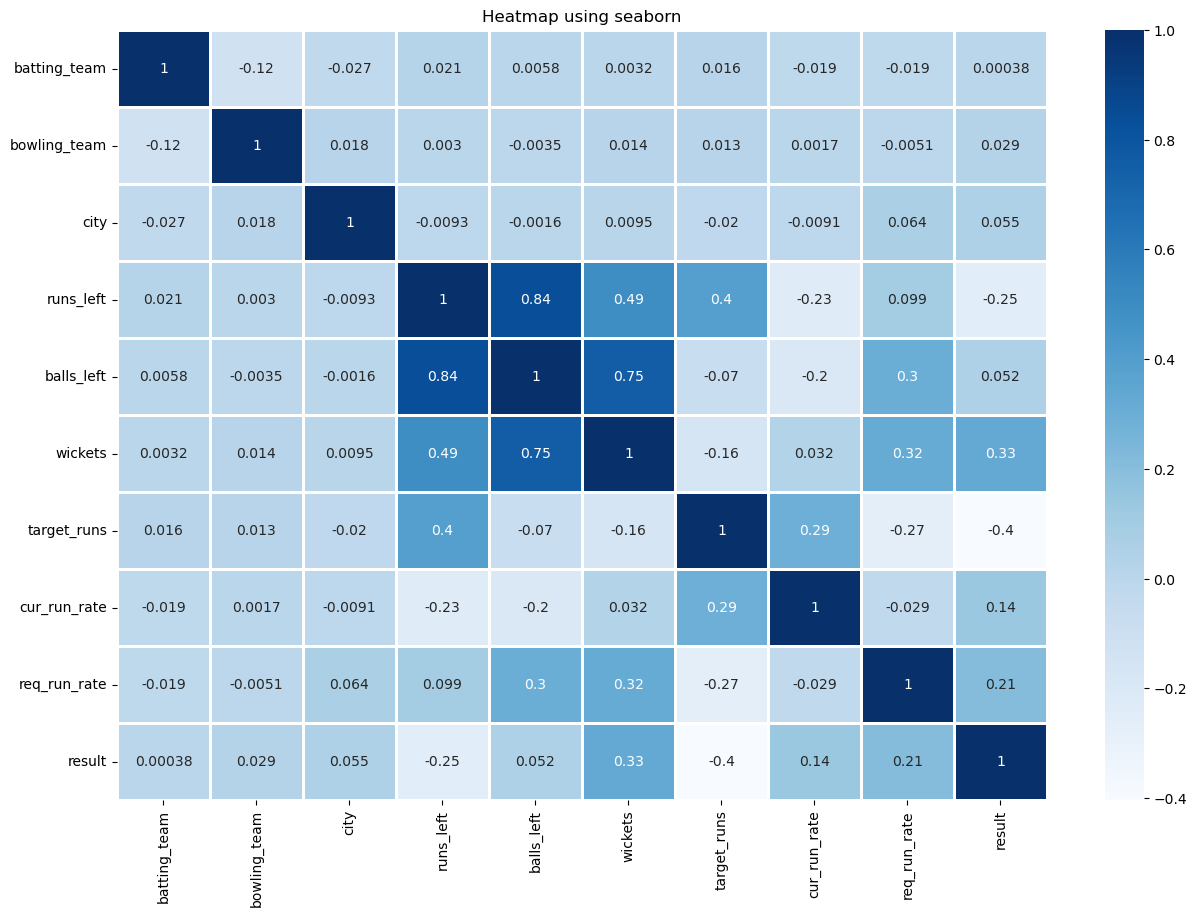

In [116]:
plt.figure(figsize=(15,10))
heatmap=sns.heatmap(corr1,linewidth=1,annot=True,cmap=plt.cm.Blues)
plt.title("Heatmap using seaborn")
plt.show()

# Visualization of dataset

<AxesSubplot:xlabel='wickets', ylabel='balls_left'>

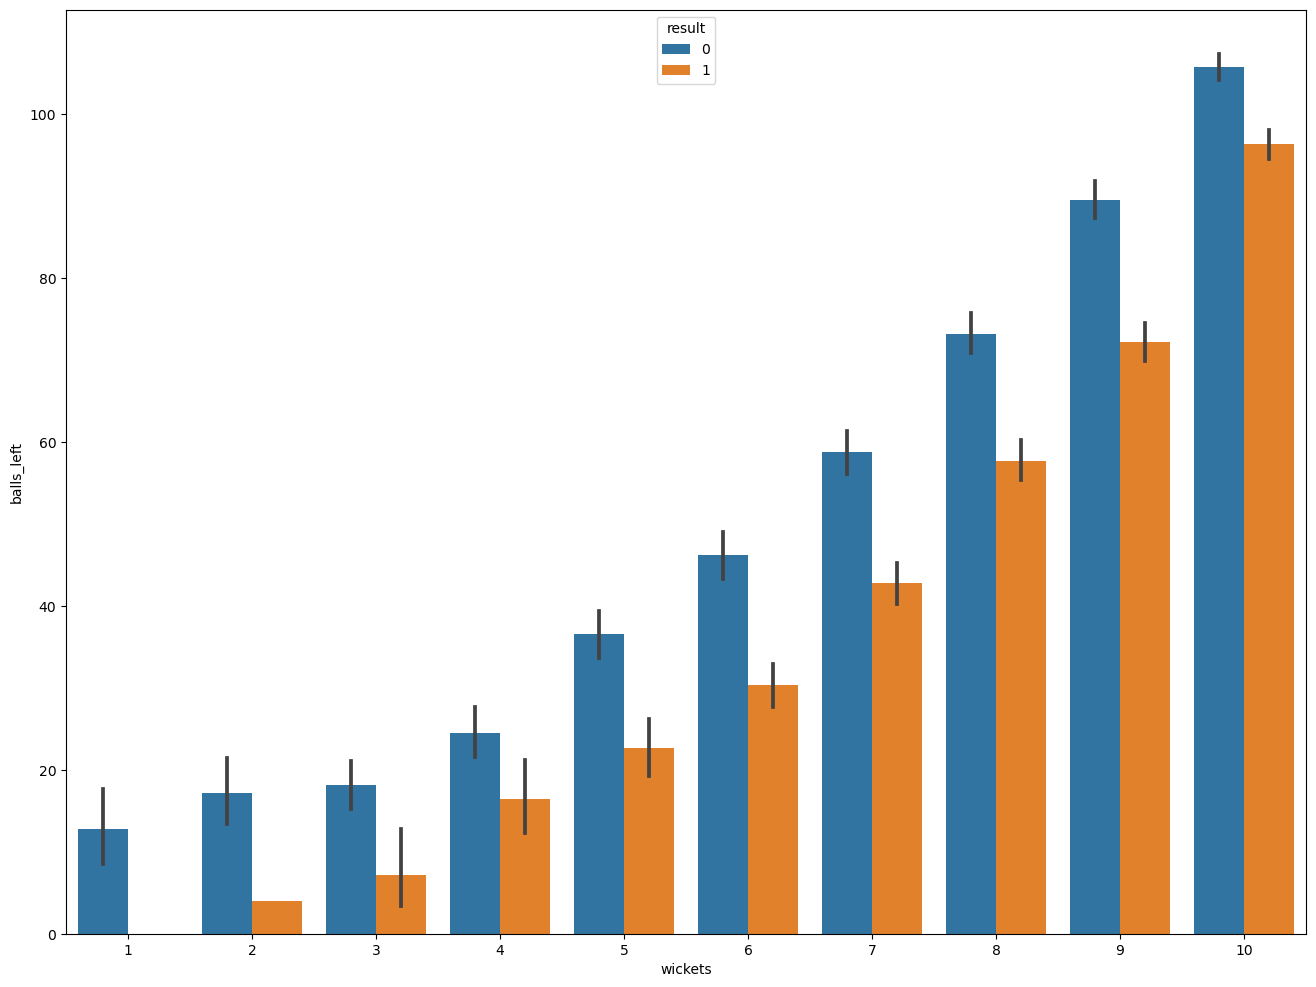

In [117]:
v = data.sample(frac=0.05, replace=True, random_state=1)
plt.figure(figsize=(16,12))
sns.barplot(x = 'wickets', y = 'balls_left',hue='result', data =v)


<AxesSubplot:xlabel='runs_left', ylabel='balls_left'>

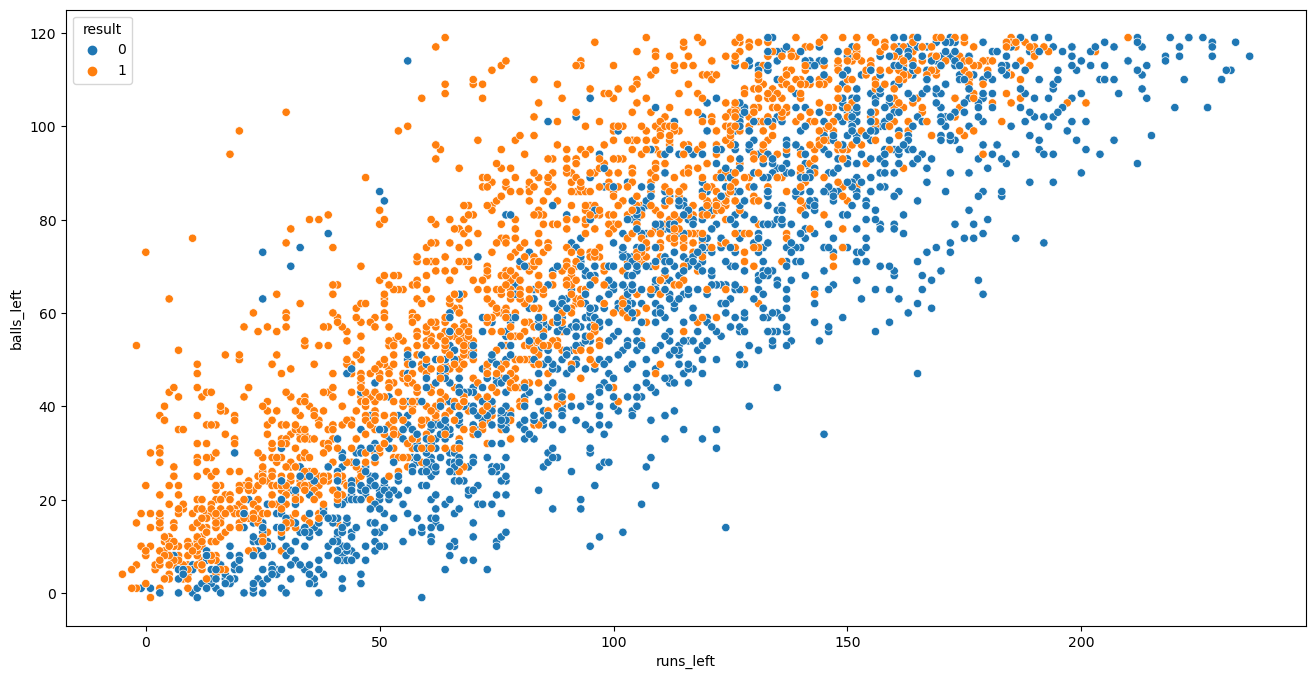

In [118]:
v1 = data.sample(frac=0.05, replace=True, random_state=1)
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'runs_left',y='balls_left', hue='result', data =v1)

<AxesSubplot:xlabel='wickets', ylabel='runs_left'>

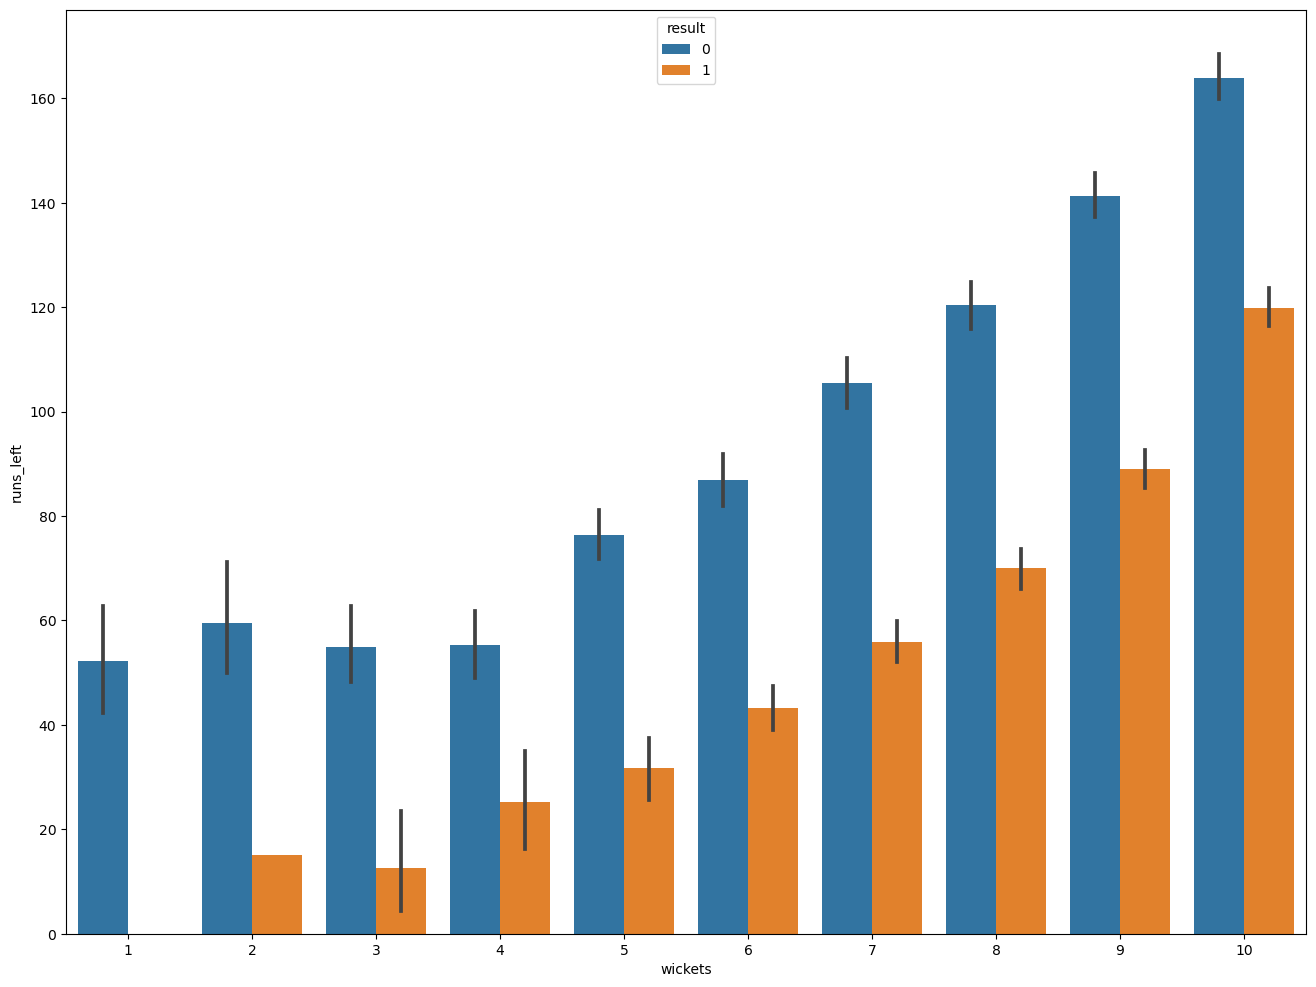

In [119]:
v2 = data.sample(frac=0.05, replace=True, random_state=1)
plt.figure(figsize=(16,12))
sns.barplot(x = 'wickets', y = 'runs_left',hue='result', data =v2)

<AxesSubplot:xlabel='runs_left', ylabel='target_runs'>

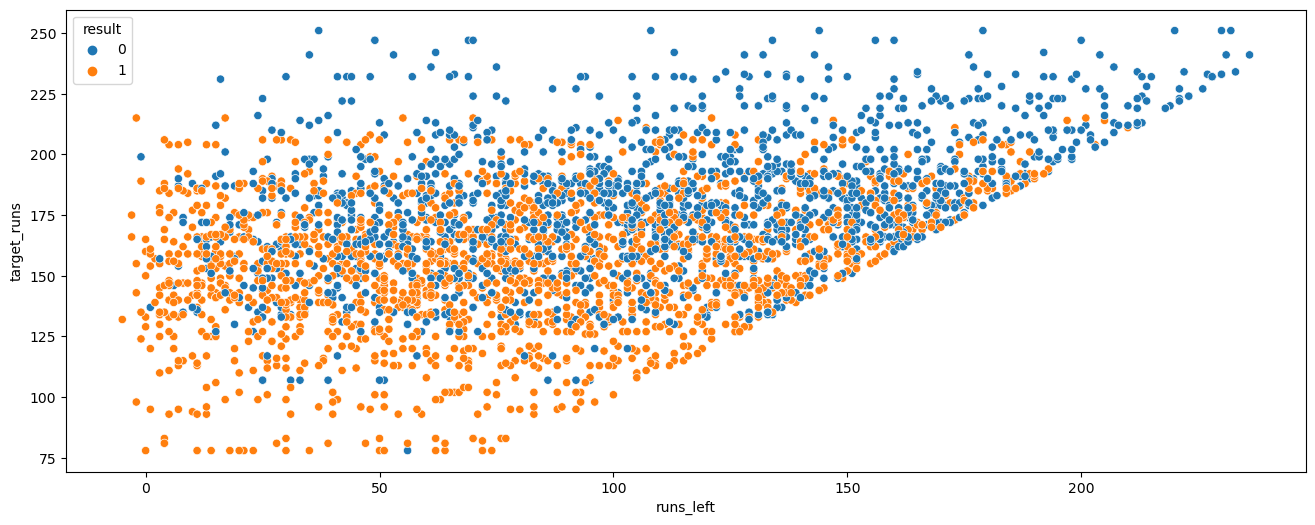

In [120]:
v3 = data.sample(frac=0.05, replace=True, random_state=1)
plt.figure(figsize=(16,6))
sns.scatterplot(x = 'runs_left', y = 'target_runs',hue='result', data =v3)

<AxesSubplot:xlabel='result', ylabel='target_runs'>

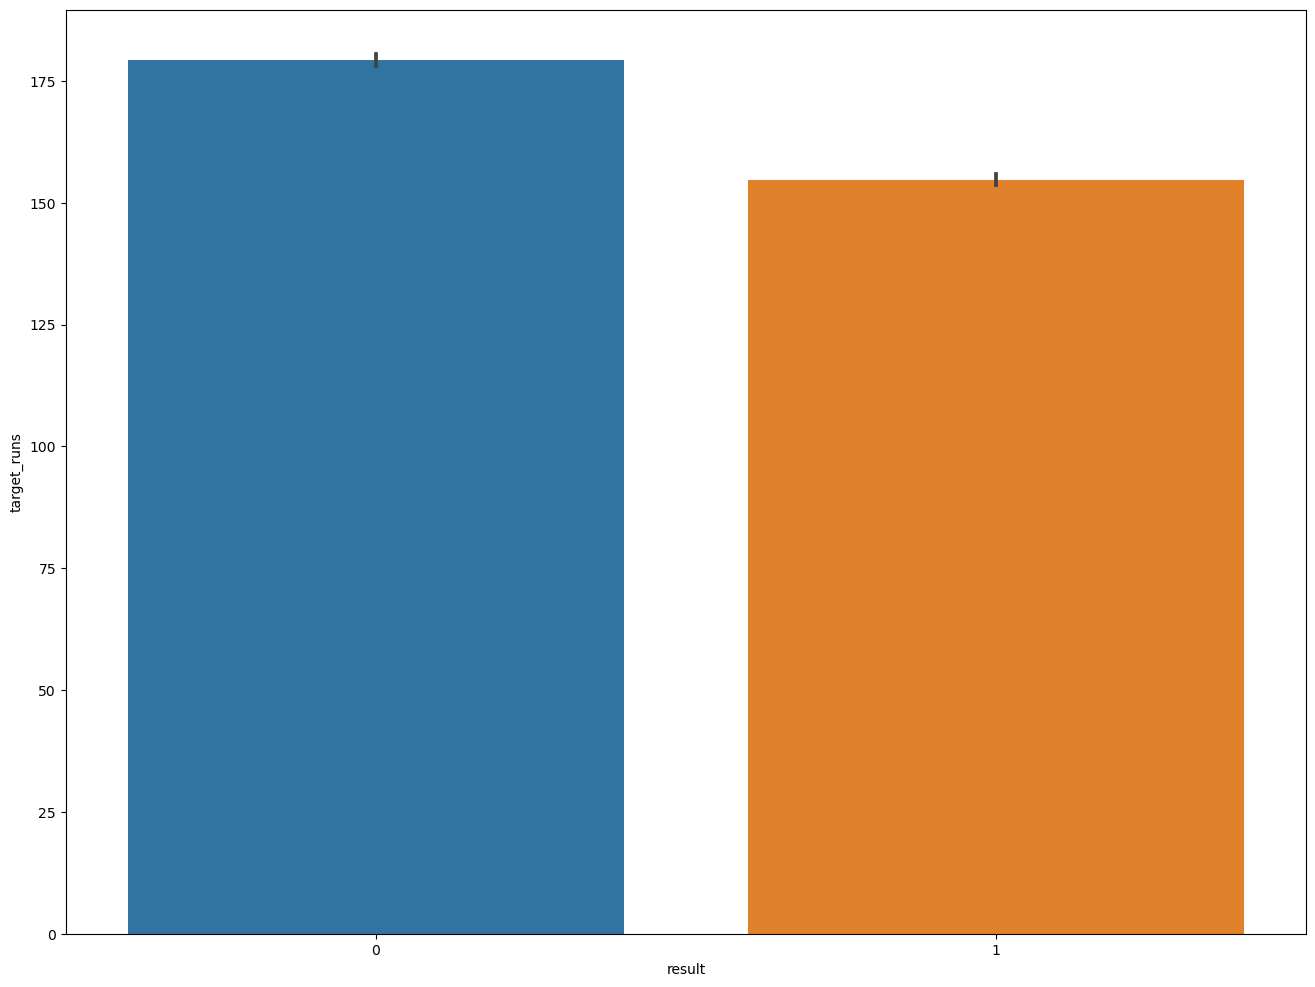

In [121]:
v5 = data.sample(frac=0.05, replace=True, random_state=1)
plt.figure(figsize=(16,12))
sns.barplot(x = 'result', y = 'target_runs', data =v5)


<AxesSubplot:xlabel='batting_team', ylabel='bowling_team'>

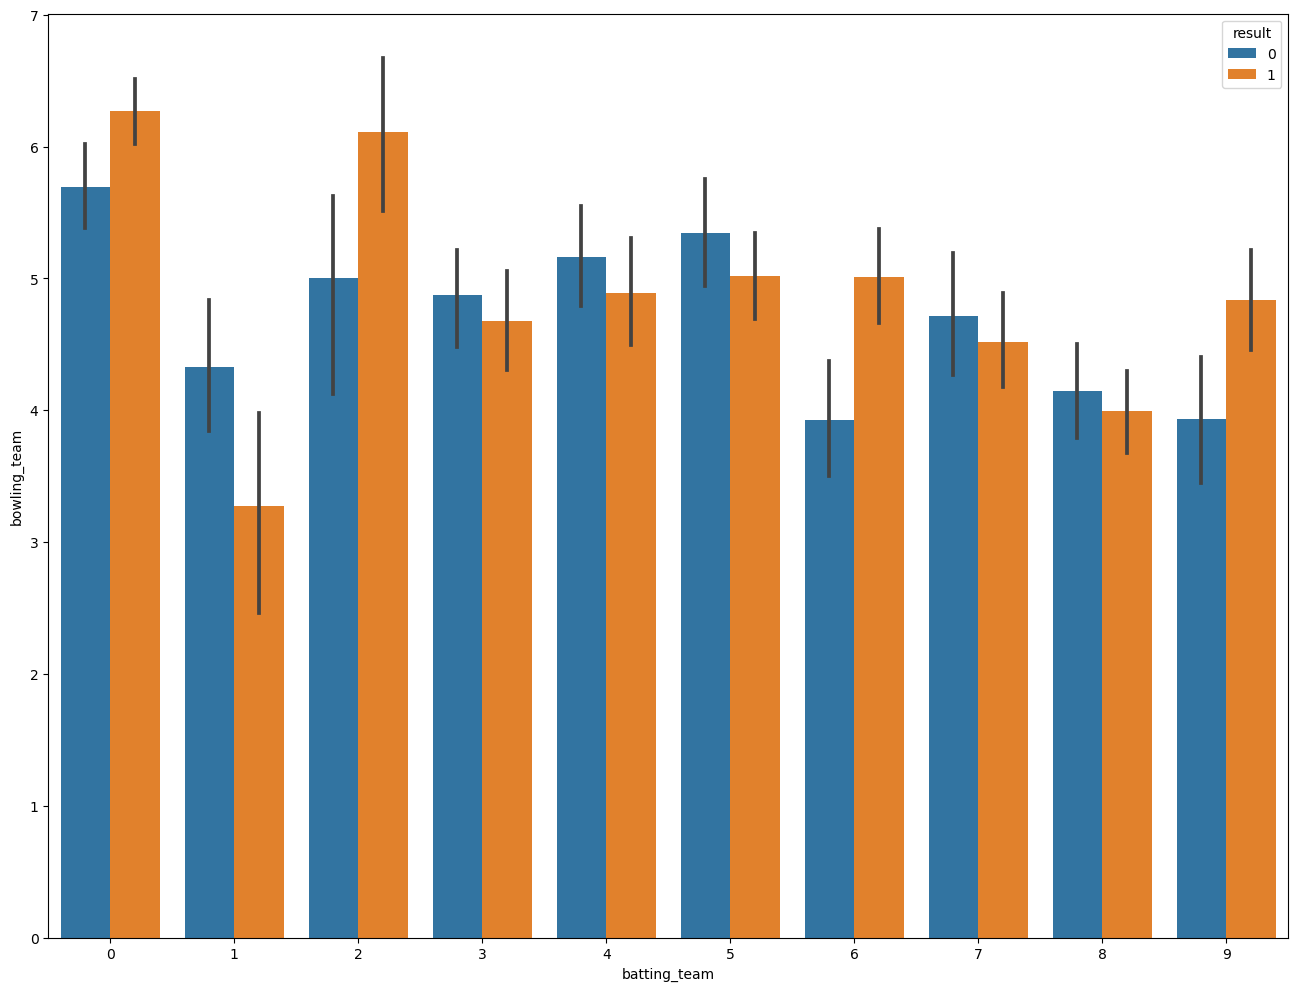

In [122]:
v6 = data.sample(frac=0.05, replace=True, random_state=1)
plt.figure(figsize=(16,12))
sns.barplot(x = 'batting_team', y = 'bowling_team',hue='result', data =v5)


# MODEL_2

In [123]:
x1=data.iloc[:,0:-1]
y1=data.iloc[:,-1]

In [124]:
xtr,xte,ytr,yte=train_test_split(x1,y1,test_size=0.33,random_state=42)

In [125]:
xtr.shape,xte.shape,ytr.shape,yte.shape

((47955, 9), (23621, 9), (47955,), (23621,))

# Logistic regression

In [126]:
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()

In [127]:
lg1.fit(xtr,ytr)

LogisticRegression()

In [128]:
lg1_p1=lg.predict(xte)
lg1_p1

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [129]:
xtr

,batting_team,bowling_team,city,runs_left,balls_left,wickets,target_runs,cur_run_rate,req_run_rate
1377,3,9,14,73,33,6,192,8.206897,2372
36544,5,4,7,70,57,8,158,8.380952,7041
45429,8,4,2,112,44,4,199,6.868421,2970
4195,6,0,8,51,20,4,209,9.480000,2975
36406,7,4,16,71,79,9,125,7.902439,5567
...,...,...,...,...,...,...,...,...,...
37199,8,7,2,97,101,10,118,6.631579,5820
6265,1,0,8,11,15,7,145,7.657143,4938
55723,3,8,2,93,55,8,192,9.138462,505
860,9,5,19,112,58,8,173,5.903226,1503


In [130]:
ytr

1377     0
36544    0
45429    0
4195     0
36406    1
        ..
37199    1
6265     1
55723    1
860      0
15797    1
Name: result, Length: 47955, dtype: int64

In [131]:
from sklearn.metrics import confusion_matrix
lg1_cf1=confusion_matrix(yte,lg1_p1)
lg1_cf1 

array([[8249, 2968],
       [2664, 9740]], dtype=int64)

In [132]:
lg1_ac1=lg1_cf1.diagonal().sum()/lg1_cf1.sum()*100
lg1_ac1

76.15680961855975

In [133]:
from sklearn.metrics import classification_report

In [134]:
print(classification_report(yte,lg1_p1))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75     11217
           1       0.77      0.79      0.78     12404

    accuracy                           0.76     23621
   macro avg       0.76      0.76      0.76     23621
weighted avg       0.76      0.76      0.76     23621



In [135]:
lg1_f1=f1_score(yte,lg1_p1)
lg1_pr1=precision_score(yte,lg1_p1)
lg1_r1=recall_score(yte,lg1_p1)
print(lg1_f1,lg1_pr1,lg1_r1)

0.7757247531060849 0.766446333018571 0.7852305707836182


# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier
dt1=DecisionTreeClassifier()

In [137]:
dt1.fit(xtr,ytr)

DecisionTreeClassifier()

In [138]:
dt1_p1=dt1.predict(xte)
dt1_p1

array([1, 1, 0, ..., 1, 1, 0], dtype=int64)

In [139]:
dt1_c1=confusion_matrix(yte,dt1_p1)
dt1_c1

array([[11005,   212],
       [  185, 12219]], dtype=int64)

In [140]:
dt1_ac1=dt1_c1.diagonal().sum()/dt1_c1.sum()*100
dt1_ac1

98.31929215528555

In [141]:
print(classification_report(yte,dt1_p1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11217
           1       0.98      0.99      0.98     12404

    accuracy                           0.98     23621
   macro avg       0.98      0.98      0.98     23621
weighted avg       0.98      0.98      0.98     23621



In [142]:
dt1_f1=f1_score(yte,dt1_p1)
dt1_pr1=precision_score(yte,dt1_p1)
dt1_r1=recall_score(yte,dt1_p1)
print(dt1_f1,dt1_pr1,dt1_r1)

0.9840144956714316 0.9829458611535677 0.9850854563044179


# Random Forest

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier()

In [144]:
rf1.fit(xtr,ytr)

RandomForestClassifier()

In [145]:
rf1_p1=rf1.predict(xte)

In [146]:
rf1_c1=confusion_matrix(yte,rf1_p1)
rf1_c1

array([[11172,    45],
       [   45, 12359]], dtype=int64)

In [147]:
rf1_ac1=rf1_c1.diagonal().sum()/rf1_c1.sum()*100
rf1_ac1

99.61898310825113

In [148]:
print(classification_report(yte,rf1_p1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11217
           1       1.00      1.00      1.00     12404

    accuracy                           1.00     23621
   macro avg       1.00      1.00      1.00     23621
weighted avg       1.00      1.00      1.00     23621



In [149]:
rf1_f1=f1_score(yte,rf1_p1)
rf1_pr1=precision_score(yte,rf1_p1)
rf1_r1=recall_score(yte,rf1_p1)
print(rf1_f1,rf1_pr1,rf1_r1)

0.9963721380199936 0.9963721380199936 0.9963721380199936


# KNN

In [150]:
from sklearn.neighbors import KNeighborsClassifier
knn1=KNeighborsClassifier()

In [151]:
knn1.fit(xtr,ytr)

KNeighborsClassifier()

In [152]:
knn1_p1=knn1.predict(xte)

In [153]:
knn1_c1=confusion_matrix(yte,knn1_p1)
knn1_c1

array([[8206, 3011],
       [3068, 9336]], dtype=int64)

In [154]:
knn1_ac1=knn1_c1.diagonal().sum()/knn1_c1.sum()*100
knn1_ac1

74.26442572287371

In [155]:
print(classification_report(yte,knn1_p1))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73     11217
           1       0.76      0.75      0.75     12404

    accuracy                           0.74     23621
   macro avg       0.74      0.74      0.74     23621
weighted avg       0.74      0.74      0.74     23621



In [156]:
knn1_f1=f1_score(yte,knn1_p1)
knn1_pr1=precision_score(yte,knn1_p1)
knn1_r1=recall_score(yte,knn1_p1)
print(knn1_f1,knn1_pr1,knn1_r1)

0.7543937618682074 0.7561350935449906 0.7526604321186714


# XGBOOST

In [157]:
import xgboost
from xgboost import XGBClassifier

In [158]:
xgb1=XGBClassifier()

In [159]:
xgb1.fit(xtr,ytr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [160]:
xgb1_p1=xgb1.predict(xte)

In [161]:
xgb1_c1=confusion_matrix(yte,xgb1_p1)
xgb1_c1

array([[11199,    18],
       [    7, 12397]], dtype=int64)

In [162]:
xgb1_ac1=xgb1_c1.diagonal().sum()/xgb1_c1.sum()*100
xgb1_ac1

99.8941619745142

In [163]:
print(classification_report(yte,xgb1_p1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11217
           1       1.00      1.00      1.00     12404

    accuracy                           1.00     23621
   macro avg       1.00      1.00      1.00     23621
weighted avg       1.00      1.00      1.00     23621



In [164]:
xgb1_f1=f1_score(yte,xgb1_p1)
xgb1_pr1=precision_score(yte,xgb1_p1)
xgb1_r1=recall_score(yte,xgb1_p1)
print(xgb1_f1,xgb1_pr1,xgb1_r1)

0.9989927072001288 0.9985501409585179 0.9994356659142212


# SVM

In [165]:
from sklearn.svm import SVC
svm1=SVC()

In [166]:
svm1.fit(xtr,ytr)

SVC()

In [167]:
svm1_p1=svm1.predict(xte)

In [168]:
svm1_cf1=confusion_matrix(yte,svm1_p1)
svm1_cf1

array([[7910, 3307],
       [3282, 9122]], dtype=int64)

In [169]:
svm1_ac1=svm1_cf1.diagonal().sum()/svm1_cf1.sum()*100
svm1_ac1

72.10533000296347

In [170]:
print(classification_report(yte,svm1_p1))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71     11217
           1       0.73      0.74      0.73     12404

    accuracy                           0.72     23621
   macro avg       0.72      0.72      0.72     23621
weighted avg       0.72      0.72      0.72     23621



In [171]:
svm1_f1=f1_score(yte,svm1_p1)
svm1_pr1=precision_score(yte,svm1_p1)
svm1_r1=recall_score(yte,svm1_p1)
print(svm1_f1,svm1_pr1,svm1_r1)

0.7346675794305965 0.7339287151017782 0.735407932924863


In [172]:
L6=["Logistic","DT","Rf","XGB","SVM","KNN"]
L7=[lg1_ac1,dt1_ac1,rf1_ac1,xgb1_ac1,svm1_ac1,knn1_ac1]
L8=[lg1_pr1,dt1_pr1,rf1_pr1,xgb1_pr1,svm1_pr1,knn1_pr1]
L9=[lg1_r1,dt1_r1,rf1_r1,xgb1_r1,svm1_r1,knn1_r1]
L10=[lg1_f1,dt1_f1,rf1_f1,xgb1_f1,svm1_f1,knn1_f1]

In [173]:
df2=pd.DataFrame({"Model":L6,"Accuracy":L7,"Precision":L8,"Recall":L9,"f1_score":L10})
df2

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,76.156810,0.766446,0.785231,0.775725
1,DT,98.319292,0.982946,0.985085,0.984014
2,Rf,99.618983,0.996372,0.996372,0.996372
3,XGB,99.894162,0.998550,0.999436,0.998993
4,SVM,72.105330,0.733929,0.735408,0.734668
5,KNN,74.264426,0.756135,0.752660,0.754394


<AxesSubplot:>

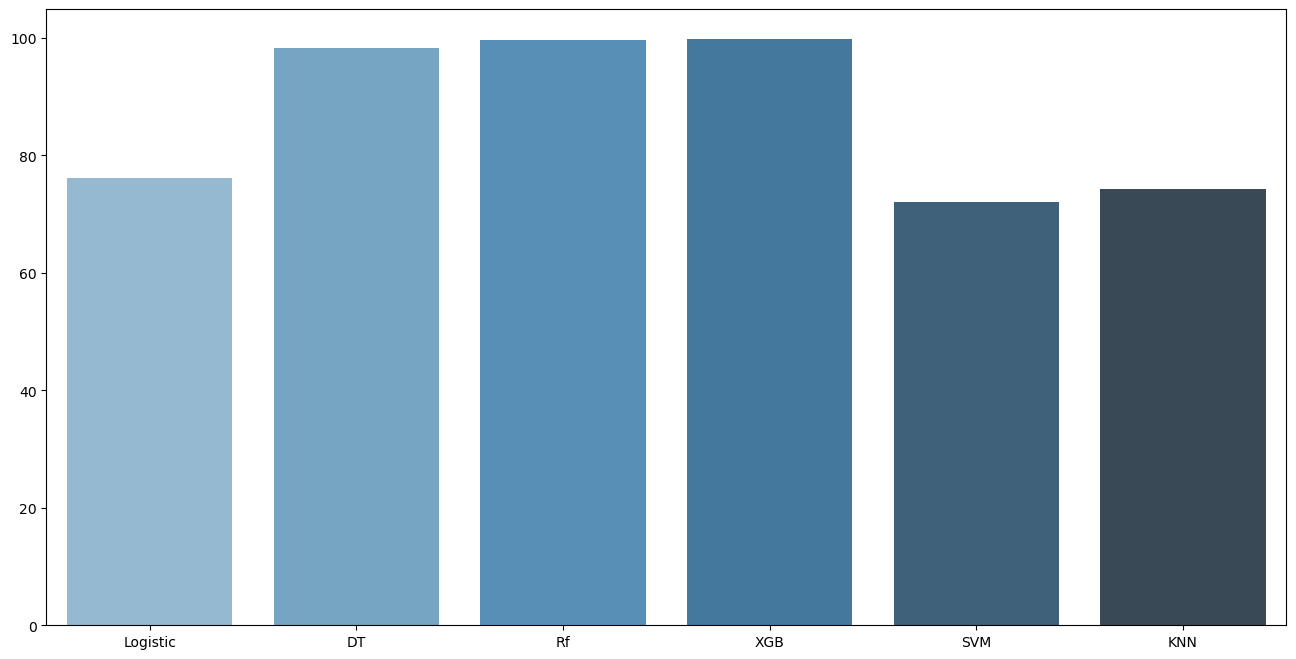

In [174]:
plt.figure(figsize=(16,8))
sns.barplot(x = L6, y = L7, palette="Blues_d")

In [176]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'PRC-CURVE')

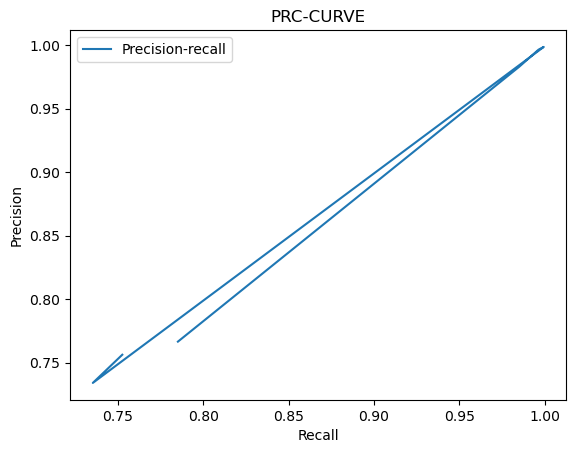

In [177]:
plt.plot(L9,L8,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

In [178]:
print("Model 1 & Model 2","\n")
print(df1,"\n")
print(df2,"\n")

Model 1 & Model 2 

      Model   Accuracy  Precision    Recall  f1_score
0  Logistic  76.047779   0.764812  0.788212  0.776336
1        DT  98.630902   0.987925  0.986093  0.987008
2        Rf  99.713607   0.998275  0.996291  0.997282
3       XGB  99.930148   0.999338  0.999338  0.999338
4       SVM  71.996368   0.735157  0.733113  0.734134
5       KNN  74.902207   0.764258  0.757881  0.761056 

      Model   Accuracy  Precision    Recall  f1_score
0  Logistic  76.156810   0.766446  0.785231  0.775725
1        DT  98.319292   0.982946  0.985085  0.984014
2        Rf  99.618983   0.996372  0.996372  0.996372
3       XGB  99.894162   0.998550  0.999436  0.998993
4       SVM  72.105330   0.733929  0.735408  0.734668
5       KNN  74.264426   0.756135  0.752660  0.754394 



# Cross Validation on Model 2

# Logistic Regression

In [179]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [180]:
lg4= LogisticRegression()

In [181]:
k = 5 
lg_kf1 = KFold(n_splits=k, shuffle=True, random_state=42)
lg_scores1 = cross_val_score(lg4, xtr, ytr, cv=lg_kf1, scoring='accuracy')

In [182]:
print("Accuracy Scores for Each Fold:")
print(lg_scores1)

Accuracy Scores for Each Fold:
[0.76488375 0.76613492 0.76728183 0.76300699 0.76488375]


In [183]:
lg_mean_accuracy1 = np.mean(lg_scores1)
print("Mean Accuracy:", lg_mean_accuracy1*100)

Mean Accuracy: 76.52382441872588


# RF

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [185]:
rf4 = RandomForestClassifier(n_estimators=100, random_state=42) 

In [186]:
k = 8  # Number of folds
rf_scores1 = cross_val_score(rf4, xtr, ytr, cv=k, scoring='accuracy')

In [187]:
print("Accuracy Scores for Each Fold:")
print(rf_scores1)

Accuracy Scores for Each Fold:
[0.993995   0.99633028 0.99599666 0.996997   0.99332666 0.99683016
 0.99616283 0.9964965 ]


In [188]:
rf_mean_accuracy1 = rf_scores1.mean()
print("Mean Accuracy:", rf_mean_accuracy1*100)

Mean Accuracy: 99.57668851782002


# DT

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [190]:
dt4 = DecisionTreeClassifier(random_state=42)

In [191]:
k = 5  # Number of folds
dt_scores1 = cross_val_score(dt4, xtr, ytr, cv=k, scoring='accuracy')

In [192]:
print("Accuracy Scores for Each Fold:")
print(dt_scores1)

Accuracy Scores for Each Fold:
[0.97925138 0.98373475 0.97841727 0.97487228 0.97935565]


In [193]:
dt_mean_accuracy1 = dt_scores1.mean()
print("Mean Accuracy:", dt_mean_accuracy1*100)

Mean Accuracy: 97.91262642060265


# KNN

In [194]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [195]:
knn4 = KNeighborsClassifier(n_neighbors=5)

In [196]:
k = 5  # Number of folds
knn_scores1 = cross_val_score(knn4, xtr, ytr, cv=k, scoring='accuracy')

In [197]:
print("Accuracy Scores for Each Fold:")
print(knn_scores1)

Accuracy Scores for Each Fold:
[0.7439266  0.74298822 0.74152852 0.74309248 0.74997393]


In [198]:
knn_mean_accuracy1 = knn_scores1.mean()
print("Mean Accuracy:", knn_mean_accuracy1*100)

Mean Accuracy: 74.4301949744552


# XGB

In [199]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [200]:
xgb4 = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of trees
    random_state=42  # Random seed
)

In [201]:
k = 5  # Number of folds
xgb_scores1 = cross_val_score(xgb4, xtr, ytr, cv=k, scoring='accuracy')

In [202]:
print("Accuracy Scores for Each Fold:")
print(xgb_scores1)

Accuracy Scores for Each Fold:
[0.82931915 0.83901574 0.83953707 0.83766031 0.83912001]


In [203]:
xgb_mean_accuracy1 = xgb_scores1.mean()
print("Mean Accuracy:", xgb_mean_accuracy1*100)

Mean Accuracy: 83.69304556354915


In [204]:
L11=["Logistic","DT","Rf","XGB","KNN"]
L12=[lg1_ac1,dt1_ac1,rf1_ac1,xgb1_ac1,knn1_ac1]
L13=[lg_mean_accuracy1*100,dt_mean_accuracy1*100,rf_mean_accuracy1*100,xgb_mean_accuracy1*100,knn_mean_accuracy1*100]

In [205]:
df5=pd.DataFrame({"Model":L11,"Testing_Accuracy":L12,"Cross_validation_Accuracy":L13})
df5

,Model,Testing_Accuracy,Cross_validation_Accuracy
0,Logistic,76.156810,76.523824
1,DT,98.319292,97.912626
2,Rf,99.618983,99.576689
3,XGB,99.894162,83.693046
4,KNN,74.264426,74.430195


<AxesSubplot:>

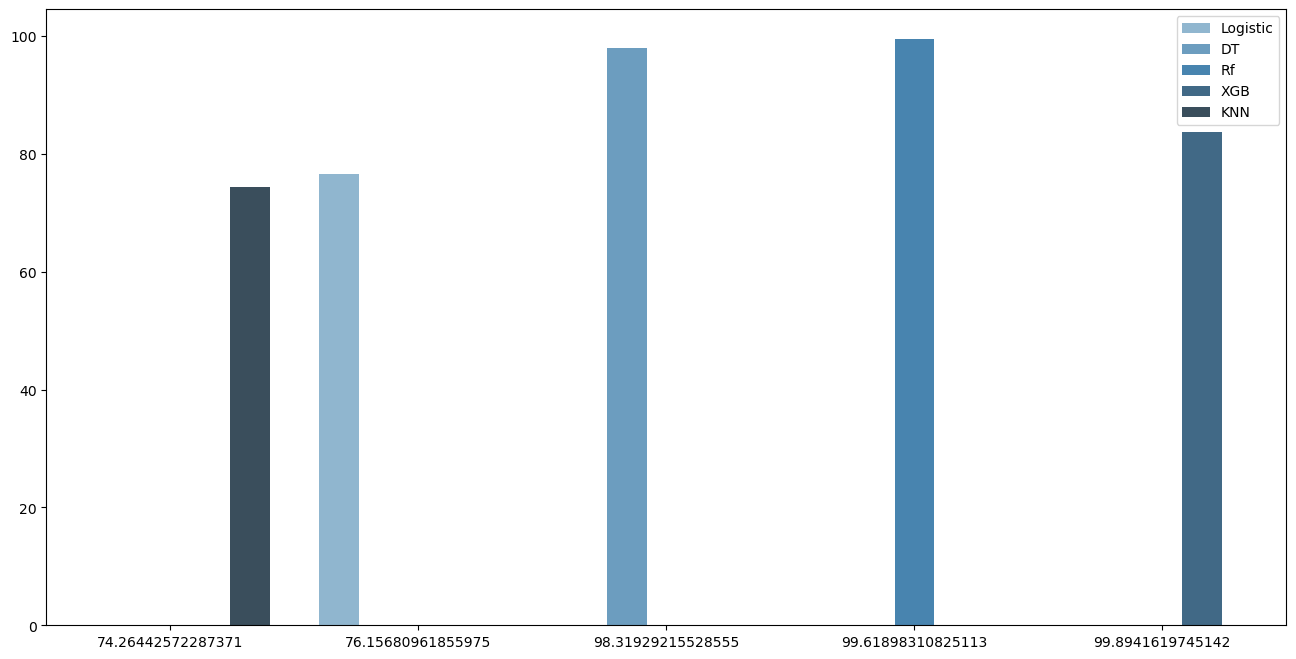

In [206]:
plt.figure(figsize=(16,8))
sns.barplot(x = L12, y = L13,hue=L11, palette="Blues_d")

# Feature Selection

# RFE(Recursive Feature Elimination)

In [207]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [208]:
rfe=RFE(dtree,n_features_to_select=5)

In [209]:
rfe.fit(data.iloc[:,:-1],data.iloc[:,-1])

RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)

In [210]:
rfe.support_

array([ True,  True,  True, False, False, False,  True, False,  True])

In [211]:
f1=pd.DataFrame({"feature":list(rfe.support_),"col":list(data.iloc[:,:-1].columns)})

In [212]:
f1

,feature,col
0,True,batting_team
1,True,bowling_team
2,True,city
3,False,runs_left
4,False,balls_left
5,False,wickets
6,True,target_runs
7,False,cur_run_rate
8,True,req_run_rate


In [213]:
data=data.drop(["runs_left","balls_left","wickets","cur_run_rate"],axis=True)
data.head()

,batting_team,bowling_team,city,target_runs,req_run_rate,result
0,8,9,14,208,714,0
1,8,9,14,208,775,0
2,8,9,14,208,842,0
3,8,9,14,208,834,0
4,8,9,14,208,757,0


In [214]:
x2=data.iloc[:,:-1]
y2=data.iloc[:,-1]

In [215]:
x2.head()

,batting_team,bowling_team,city,target_runs,req_run_rate
0,8,9,14,208,714
1,8,9,14,208,775
2,8,9,14,208,842
3,8,9,14,208,834
4,8,9,14,208,757


In [216]:
y2.head()

0    0
1    0
2    0
3    0
4    0
Name: result, dtype: int64

In [217]:
xtr1,xte1,ytr1,yte1=train_test_split(x2,y2,test_size=0.2,random_state=100)
xtr1.shape,xte1.shape,ytr1.shape,yte1.shape

((57260, 5), (14316, 5), (57260,), (14316,))

# Model-3 (After Feature Selection)

# Random Forest

In [218]:
from sklearn.ensemble import RandomForestClassifier
rf2=RandomForestClassifier()

In [219]:
rf2.fit(xtr1,ytr1)

RandomForestClassifier()

In [220]:
rf2_p2=rf2.predict(xte1)

In [221]:
rf2_c2=confusion_matrix(yte1,rf2_p2)
rf2_c2

array([[6829,   26],
       [  21, 7440]], dtype=int64)

In [222]:
rf2_ac2=rf2_c2.diagonal().sum()/rf2_c2.sum()*100
rf2_ac2

99.67169600447052

In [223]:
print(classification_report(yte1,rf2_p2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6855
           1       1.00      1.00      1.00      7461

    accuracy                           1.00     14316
   macro avg       1.00      1.00      1.00     14316
weighted avg       1.00      1.00      1.00     14316



In [224]:
rf2_f2=f1_score(yte1,rf2_p2)
rf2_pr2=precision_score(yte1,rf2_p2)
rf2_r2=recall_score(yte1,rf2_p2)
print(rf2_f2,rf2_pr2,rf2_r2)

0.9968513432035907 0.996517546209483 0.9971853638922397


# Logistic

In [225]:
from sklearn.linear_model import LogisticRegression
lg2=LogisticRegression()

In [226]:
lg2.fit(xtr1,ytr1)

LogisticRegression()

In [227]:
lg2_p2=lg2.predict(xte1)
lg2_p2

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [228]:
lg2_cf2=confusion_matrix(yte1,lg2_p2)
lg2_cf2 

array([[4049, 2806],
       [2036, 5425]], dtype=int64)

In [229]:
lg2_ac2=lg2_cf2.diagonal().sum()/lg2_cf2.sum()*100
lg2_ac2

66.17770326906958

In [230]:
print(classification_report(yte1,lg2_p2))

              precision    recall  f1-score   support

           0       0.67      0.59      0.63      6855
           1       0.66      0.73      0.69      7461

    accuracy                           0.66     14316
   macro avg       0.66      0.66      0.66     14316
weighted avg       0.66      0.66      0.66     14316



In [231]:
lg2_f2=f1_score(yte1,lg2_p2)
lg2_pr2=precision_score(yte1,lg2_p2)
lg2_r2=recall_score(yte1,lg2_p2)
print(lg2_f2,lg2_pr2,lg2_r2)

0.6914351261789448 0.659093670270927 0.7271143278380914


# Decision Tree

In [232]:
from sklearn.tree import DecisionTreeClassifier
dt2=DecisionTreeClassifier()

In [233]:
dt2.fit(xtr1,ytr1)

DecisionTreeClassifier()

In [234]:
dt2_p2=dt2.predict(xte1)
dt2_p2

array([0, 1, 0, ..., 1, 1, 1], dtype=int64)

In [235]:
dt2_c2=confusion_matrix(yte1,dt2_p2)
dt2_c2

array([[6803,   52],
       [  51, 7410]], dtype=int64)

In [236]:
dt2_ac2=dt2_c2.diagonal().sum()/dt2_c2.sum()*100
dt2_ac2

99.28052528639284

In [237]:
print(classification_report(yte1,dt2_p2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6855
           1       0.99      0.99      0.99      7461

    accuracy                           0.99     14316
   macro avg       0.99      0.99      0.99     14316
weighted avg       0.99      0.99      0.99     14316



In [238]:
dt2_f2=f1_score(yte1,dt2_p2)
dt2_pr2=precision_score(yte1,dt2_p2)
dt2_r2=recall_score(yte1,dt2_p2)
print(dt2_f2,dt2_pr2,dt2_r2)

0.9930979025665081 0.9930313588850174 0.9931644551668677


# KNN

In [239]:
from sklearn.neighbors import KNeighborsClassifier
knn2=KNeighborsClassifier()

In [240]:
knn2.fit(xtr1,ytr1)

KNeighborsClassifier()

In [241]:
knn2_p2=knn2.predict(xte1)

In [242]:
knn2_c2=confusion_matrix(yte1,knn2_p2)
knn2_c2

array([[5204, 1651],
       [1789, 5672]], dtype=int64)

In [243]:
knn2_ac2=knn2_c2.diagonal().sum()/knn2_c2.sum()*100
knn2_ac2

75.97094160379994

In [244]:
print(classification_report(yte1,knn2_p2))

              precision    recall  f1-score   support

           0       0.74      0.76      0.75      6855
           1       0.77      0.76      0.77      7461

    accuracy                           0.76     14316
   macro avg       0.76      0.76      0.76     14316
weighted avg       0.76      0.76      0.76     14316



In [245]:
knn2_f2=f1_score(yte1,knn2_p2)
knn2_pr2=precision_score(yte1,knn2_p2)
knn2_r2=recall_score(yte1,knn2_p2)
print(knn2_f2,knn2_pr2,knn2_r2)

0.7673160173160174 0.7745459511129319 0.760219809676987


# XGBOOST

In [246]:
import xgboost
from xgboost import XGBClassifier

In [247]:
xgb2=XGBClassifier()

In [248]:
xgb2.fit(xtr1,ytr1)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [249]:
xgb2_p2=xgb2.predict(xte1)

In [250]:
xgb2_c2=confusion_matrix(yte1,xgb2_p2)
xgb2_c2

array([[6833,   22],
       [   7, 7454]], dtype=int64)

In [251]:
xgb2_ac2=xgb2_c2.diagonal().sum()/xgb2_c2.sum()*100
xgb2_ac2

99.79742944956692

In [252]:
print(classification_report(yte1,xgb2_p2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6855
           1       1.00      1.00      1.00      7461

    accuracy                           1.00     14316
   macro avg       1.00      1.00      1.00     14316
weighted avg       1.00      1.00      1.00     14316



In [253]:
xgb2_f2=f1_score(yte1,xgb2_p2)
xgb2_pr2=precision_score(yte1,xgb2_p2)
xgb2_r2=recall_score(yte1,xgb2_p2)
print(xgb2_f2,xgb2_pr2,xgb2_r2)

0.9980585124188257 0.9970572498662387 0.9990617879640799


# SVM

In [254]:
from sklearn.svm import SVC
svm2=SVC()

In [255]:
svm2.fit(xtr1,ytr1)

SVC()

In [256]:
svm2_p2=svm2.predict(xte1)

In [257]:
svm2_cf2=confusion_matrix(yte1,svm2_p2)
svm2_cf2

array([[4806, 2049],
       [2049, 5412]], dtype=int64)

In [258]:
svm2_ac2=svm2_cf2.diagonal().sum()/svm2_cf2.sum()*100
svm2_ac2

71.37468566638726

In [259]:
print(classification_report(yte1,svm2_p2))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70      6855
           1       0.73      0.73      0.73      7461

    accuracy                           0.71     14316
   macro avg       0.71      0.71      0.71     14316
weighted avg       0.71      0.71      0.71     14316



In [260]:
svm2_f2=f1_score(yte1,svm2_p2)
svm2_pr2=precision_score(yte1,svm2_p2)
svm2_r2=recall_score(yte1,svm2_p2)
print(svm2_f2,svm2_pr2,svm2_r2)

0.7253719340570969 0.7253719340570969 0.7253719340570969


In [261]:
L15=["Logistic","DT","Rf","XGB","SVM","KNN"]
L16=[lg2_ac2,dt2_ac2,rf2_ac2,xgb2_ac2,svm2_ac2,knn2_ac2]
L17=[lg2_pr2,dt2_pr2,rf2_pr2,xgb2_pr2,svm2_pr2,knn2_pr2]
L18=[lg2_r2,dt2_r2,rf2_r2,xgb2_r2,svm2_r2,knn2_r2]
L19=[lg2_f2,dt2_f2,rf2_f2,xgb2_f2,svm2_f2,knn2_f2]

In [262]:
df4=pd.DataFrame({"Model":L15,"Accuracy":L16,"Precision":L17,"Recall":L18,"f1_score":L19})
df4

,Model,Accuracy,Precision,Recall,f1_score
0,Logistic,66.177703,0.659094,0.727114,0.691435
1,DT,99.280525,0.993031,0.993164,0.993098
2,Rf,99.671696,0.996518,0.997185,0.996851
3,XGB,99.797429,0.997057,0.999062,0.998059
4,SVM,71.374686,0.725372,0.725372,0.725372
5,KNN,75.970942,0.774546,0.760220,0.767316


<AxesSubplot:>

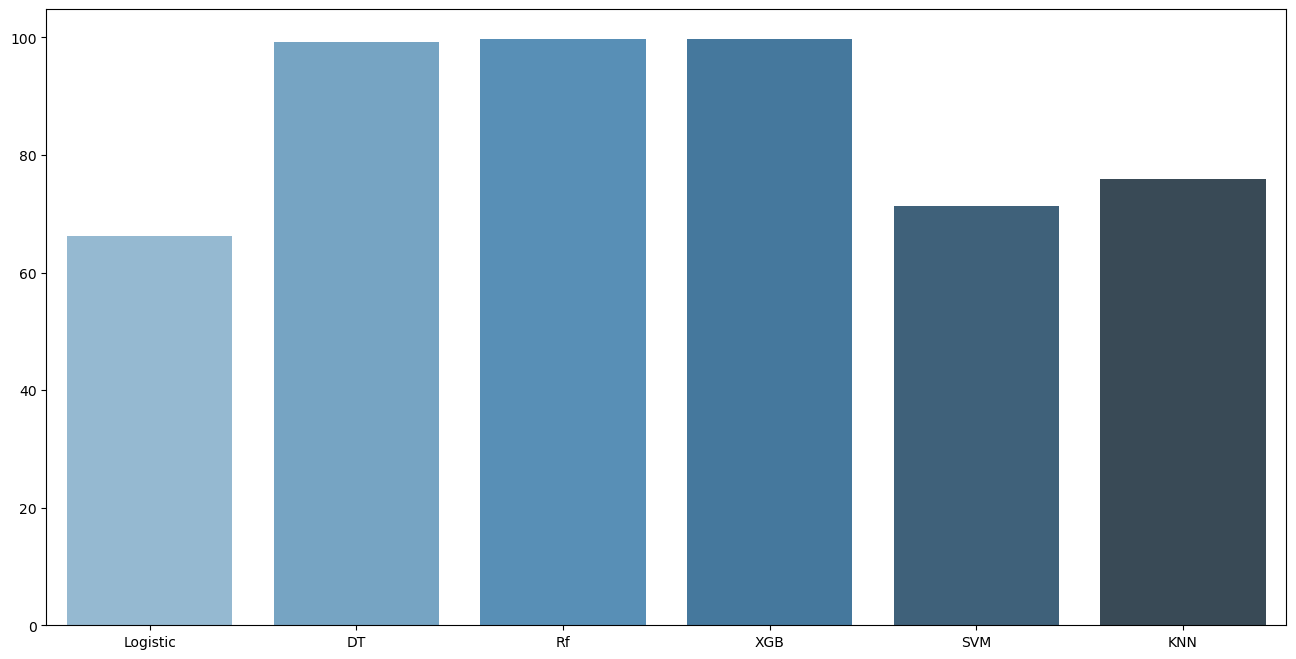

In [263]:
plt.figure(figsize=(16,8))
sns.barplot(x = L15, y = L16, palette="Blues_d")

In [265]:
#Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

Text(0.5, 1.0, 'PRC-CURVE')

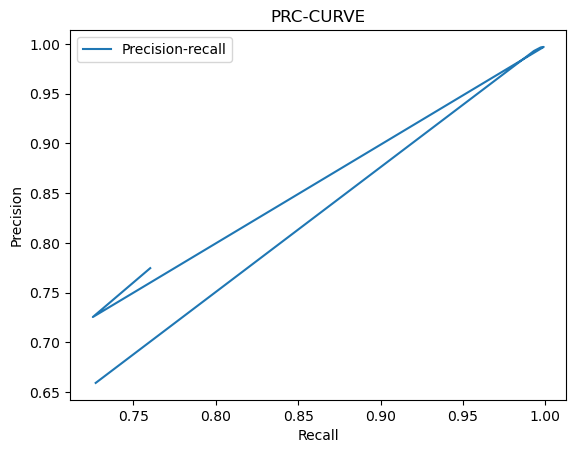

In [266]:
plt.plot(L18,L17,label="Precision-recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="upper left")
plt.title("PRC-CURVE")

# Cross validation on Model-3

# LOgistics Regression

In [267]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
import numpy as np

In [268]:
lg3= LogisticRegression()

In [269]:
k = 5 
lg_kf = KFold(n_splits=k, shuffle=True, random_state=42)
lg_scores = cross_val_score(lg3, xtr1, ytr1, cv=lg_kf, scoring='accuracy')

In [270]:
print("Accuracy Scores for Each Fold:")
print(lg_scores)

Accuracy Scores for Each Fold:
[0.67289556 0.67315753 0.67106182 0.66320293 0.67315753]


In [271]:
lg_mean_accuracy = np.mean(lg_scores)
print("Mean Accuracy:", lg_mean_accuracy*100)

Mean Accuracy: 67.0695075096053


# RF

In [272]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [273]:
rf3 = RandomForestClassifier(n_estimators=100, random_state=42) 

In [274]:
k = 8  # Number of folds
rf_scores = cross_val_score(rf3, xtr1, ytr1, cv=k, scoring='accuracy')

In [275]:
print("Accuracy Scores for Each Fold:")
print(rf_scores)

Accuracy Scores for Each Fold:
[0.99455155 0.99608829 0.99552948 0.99580889 0.99608775 0.9958083
 0.99678636 0.99524941]


In [276]:
rf_mean_accuracy = rf_scores.mean()
print("Mean Accuracy:", rf_mean_accuracy*100)

Mean Accuracy: 99.57387526511422


# DT

In [277]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [278]:
dt3 = DecisionTreeClassifier(random_state=42)

In [279]:
k = 5  # Number of folds
dt_scores = cross_val_score(dt3, xtr1, ytr1, cv=k, scoring='accuracy')

In [280]:
print("Accuracy Scores for Each Fold:")
print(dt_scores)

Accuracy Scores for Each Fold:
[0.9879497  0.99179183 0.99152986 0.99074397 0.99022005]


In [281]:
dt_mean_accuracy = dt_scores.mean()
print("Mean Accuracy:", dt_mean_accuracy*100)

Mean Accuracy: 99.04470834788683


# KNN

In [282]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


In [283]:
knn3 = KNeighborsClassifier(n_neighbors=5)

In [284]:
k = 5  # Number of folds
knn_scores = cross_val_score(knn3, xtr1, ytr1, cv=k, scoring='accuracy')

In [285]:
print("Accuracy Scores for Each Fold:")
print(knn_scores)

Accuracy Scores for Each Fold:
[0.75078589 0.7495634  0.75392944 0.74772965 0.75253231]


In [286]:
knn_mean_accuracy = knn_scores.mean()
print("Mean Accuracy:", knn_mean_accuracy*100)

Mean Accuracy: 75.09081383164514


# XGB

In [287]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score


In [288]:
xgb3 = xgb.XGBClassifier(
    n_estimators=100,  # Number of boosting rounds
    learning_rate=0.1,  # Step size shrinkage
    max_depth=3,  # Maximum depth of trees
    random_state=42  # Random seed
)

In [289]:
k = 5  # Number of folds
xgb_scores = cross_val_score(xgb3, xtr1, ytr1, cv=k, scoring='accuracy')

In [290]:
print("Accuracy Scores for Each Fold:")
print(xgb_scores)


Accuracy Scores for Each Fold:
[0.8132204  0.80902899 0.82003144 0.81610199 0.82308767]


In [291]:
xgb_mean_accuracy = xgb_scores.mean()
print("Mean Accuracy:", xgb_mean_accuracy*100)

Mean Accuracy: 81.62940971009431


In [292]:
L21=["Logistic","DT","Rf","XGB","KNN"]
L22=[lg2_ac2,dt2_ac2,rf2_ac2,xgb2_ac2,knn2_ac2]
L23=[lg_mean_accuracy*100,dt_mean_accuracy*100,rf_mean_accuracy*100,xgb_mean_accuracy*100,knn_mean_accuracy*100]

In [293]:
df5=pd.DataFrame({"Model":L11,"Testing_Accuracy":L12,"Cross_validation_Accuracy":L13})
df5

,Model,Testing_Accuracy,Cross_validation_Accuracy
0,Logistic,76.156810,76.523824
1,DT,98.319292,97.912626
2,Rf,99.618983,99.576689
3,XGB,99.894162,83.693046
4,KNN,74.264426,74.430195


<AxesSubplot:>

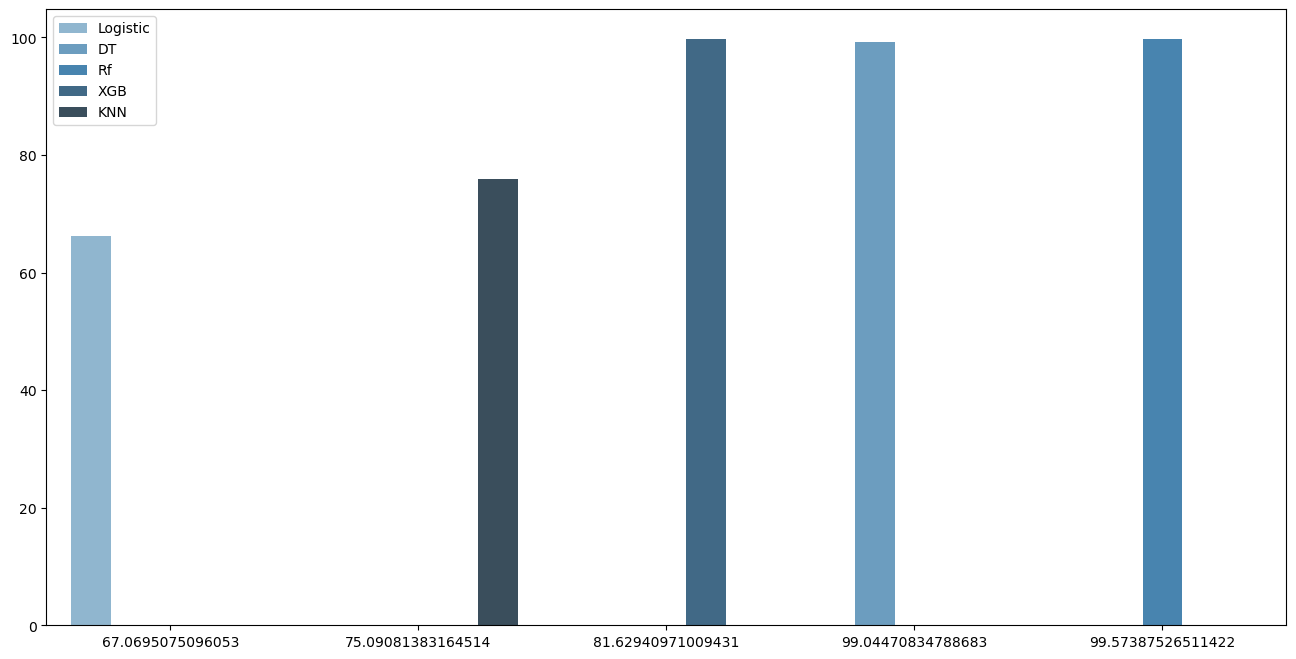

In [294]:
plt.figure(figsize=(16,8))
sns.barplot(x = L23, y = L22, hue=L21,palette="Blues_d")


In [295]:
print("Comparison between Model 1 & Model 2 & Model 3","\n")
print(df1,"\n")
print(df2,"\n")
print(df4,"\n")

Comparison between Model 1 & Model 2 & Model 3 

      Model   Accuracy  Precision    Recall  f1_score
0  Logistic  76.047779   0.764812  0.788212  0.776336
1        DT  98.630902   0.987925  0.986093  0.987008
2        Rf  99.713607   0.998275  0.996291  0.997282
3       XGB  99.930148   0.999338  0.999338  0.999338
4       SVM  71.996368   0.735157  0.733113  0.734134
5       KNN  74.902207   0.764258  0.757881  0.761056 

      Model   Accuracy  Precision    Recall  f1_score
0  Logistic  76.156810   0.766446  0.785231  0.775725
1        DT  98.319292   0.982946  0.985085  0.984014
2        Rf  99.618983   0.996372  0.996372  0.996372
3       XGB  99.894162   0.998550  0.999436  0.998993
4       SVM  72.105330   0.733929  0.735408  0.734668
5       KNN  74.264426   0.756135  0.752660  0.754394 

      Model   Accuracy  Precision    Recall  f1_score
0  Logistic  66.177703   0.659094  0.727114  0.691435
1        DT  99.280525   0.993031  0.993164  0.993098
2        Rf  99.671696   0.99